# Plant Growth Data Classification

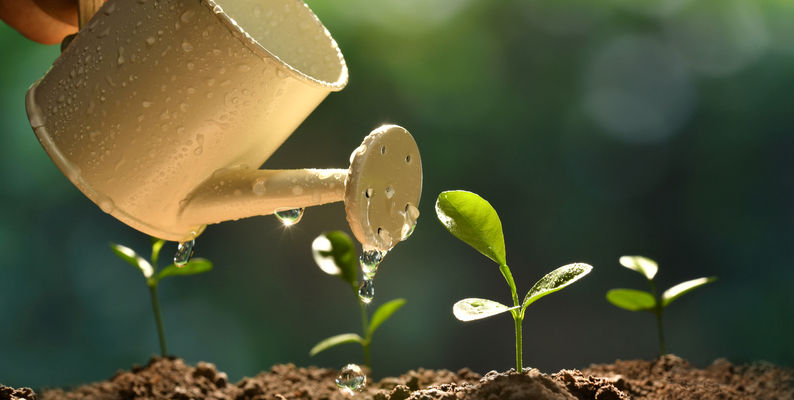

**Problem Statement**

Agricultural productivity relies on understanding and managing soil conditions to match the nutrient requirements of specific crops. With varying needs for nitrogen (N), phosphorus (P), and potassium (K), as well as sensitivity to soil temperature and pH levels, it is critical for farmers to determine which crops are most suitable for their soil conditions to optimize yield.

This dataset includes key soil properties—nutrient levels (N, P, K), average soil temperature (°F), and pH (acidity or basicity)—and maps them to specific crop types (e.g., rice, maize, various legumes, fruits, and cash crops like cotton and coffee). Using this data, we aim to develop a predictive model that suggests the most suitable crop types based on given soil characteristics.

**Objective**

To build a machine learning model that recommends the best crop(s) based on soil nutrient levels (N, P, K), temperature, and pH, thereby supporting informed decision-making for farmers and improving agricultural efficiency.

**Goals**

1. **Analyze Soil-Condition Requirements for Different Crops**: Explore the soil nutrient composition, temperature, and pH ranges ideal for each crop in the dataset.

2. **Develop Predictive Model**: Train a classification model that suggests optimal crop choices based on the input conditions of N, P, K levels, temperature, and pH.

3. **Evaluate Model Accuracy**: Assess the model's accuracy in correctly recommending crop types by validating it against test data.
Provide Insights for Crop Rotation or Soil Amendment: Use the model to suggest soil amendments or crop rotation strategies to achieve better suitability for desired crops.


# Importing Libraries and Loading dataset

In [1]:
import numpy as np
import pandas as pd


from sklearn import model_selection
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:

import matplotlib
matplotlib.use('agg')  # Or any supported backend like 'tkagg', 'qt5agg', etc.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [6]:
#!conda create -n clean_env python=3.11.7 -y
!conda activate clean_env
#!pip install matplotlib jupyter

In [1]:
#!pip install --upgrade --user matplotlib 

In [35]:
import matplotlib
print(matplotlib.__version__)

3.9.2


In [11]:
df = pd.read_csv("Plan_Growth_recommendation.csv")
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [45]:
print("Shape of the dataframe :", df.shape)
df.isna().sum()

Shape of the dataframe : (2200, 8)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [47]:
df.describe()

N            P            K       temperature   humidity    \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

           ph        rainfall    
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [48]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

# EDA - Exploratory Data Analysis

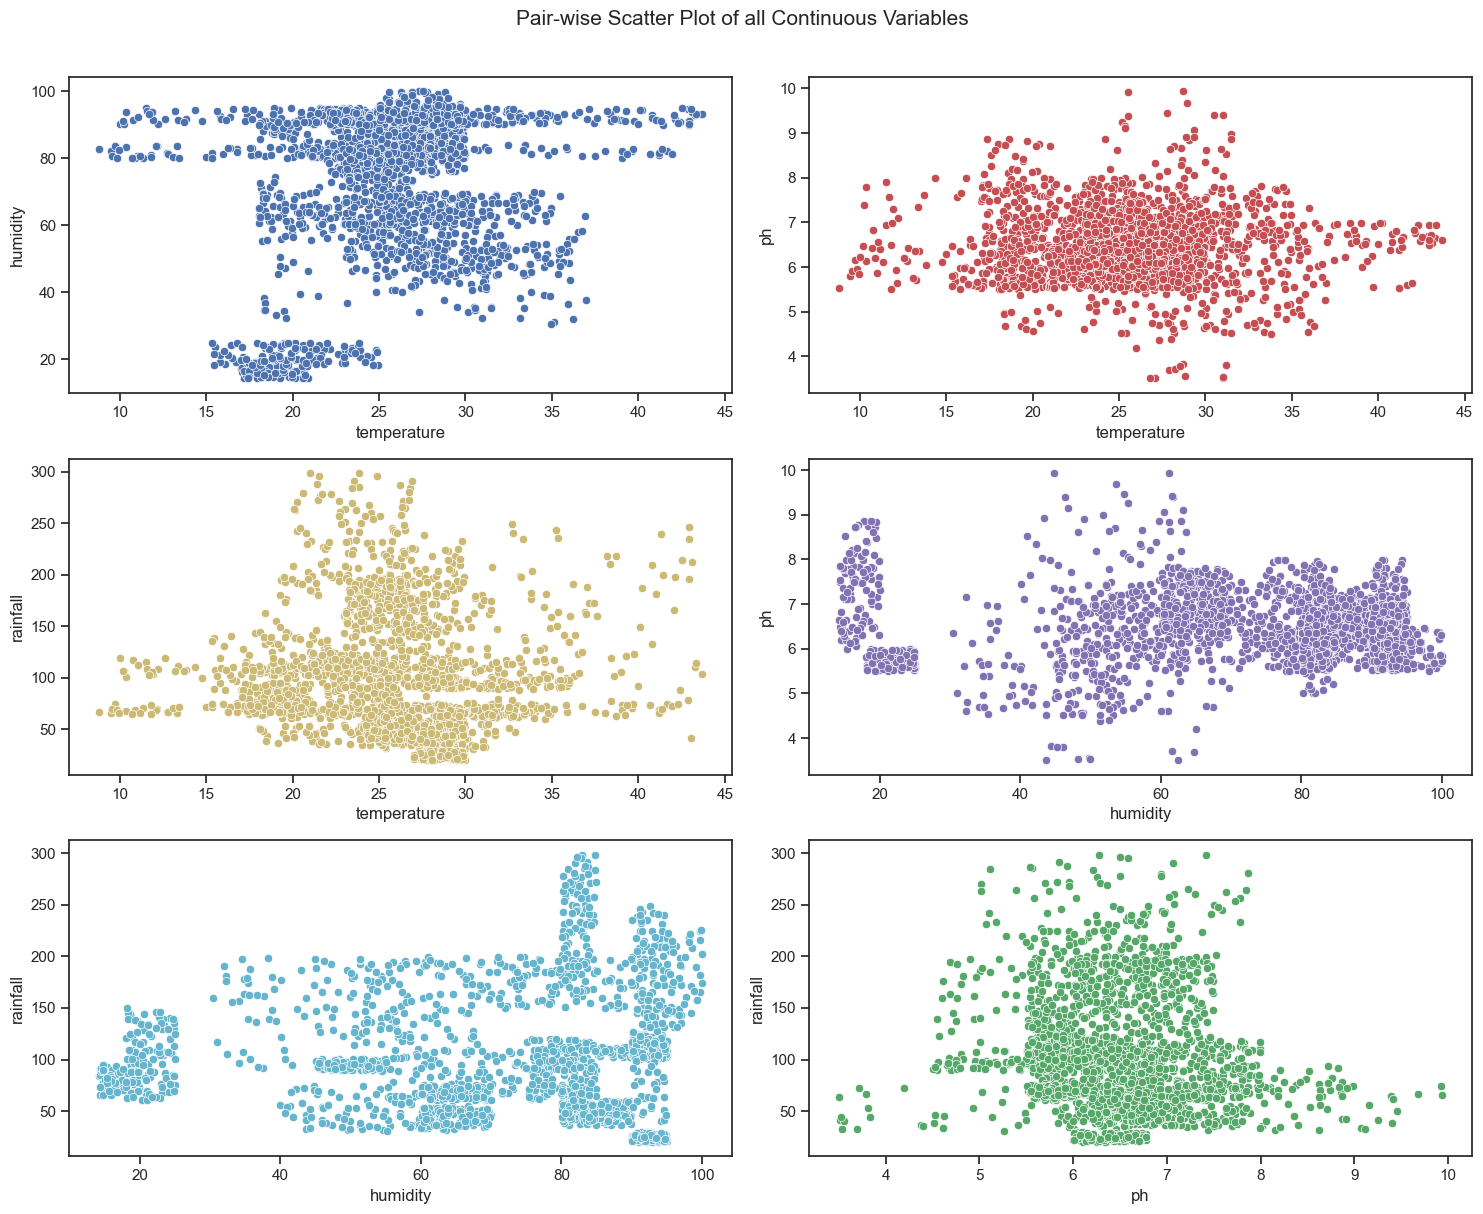

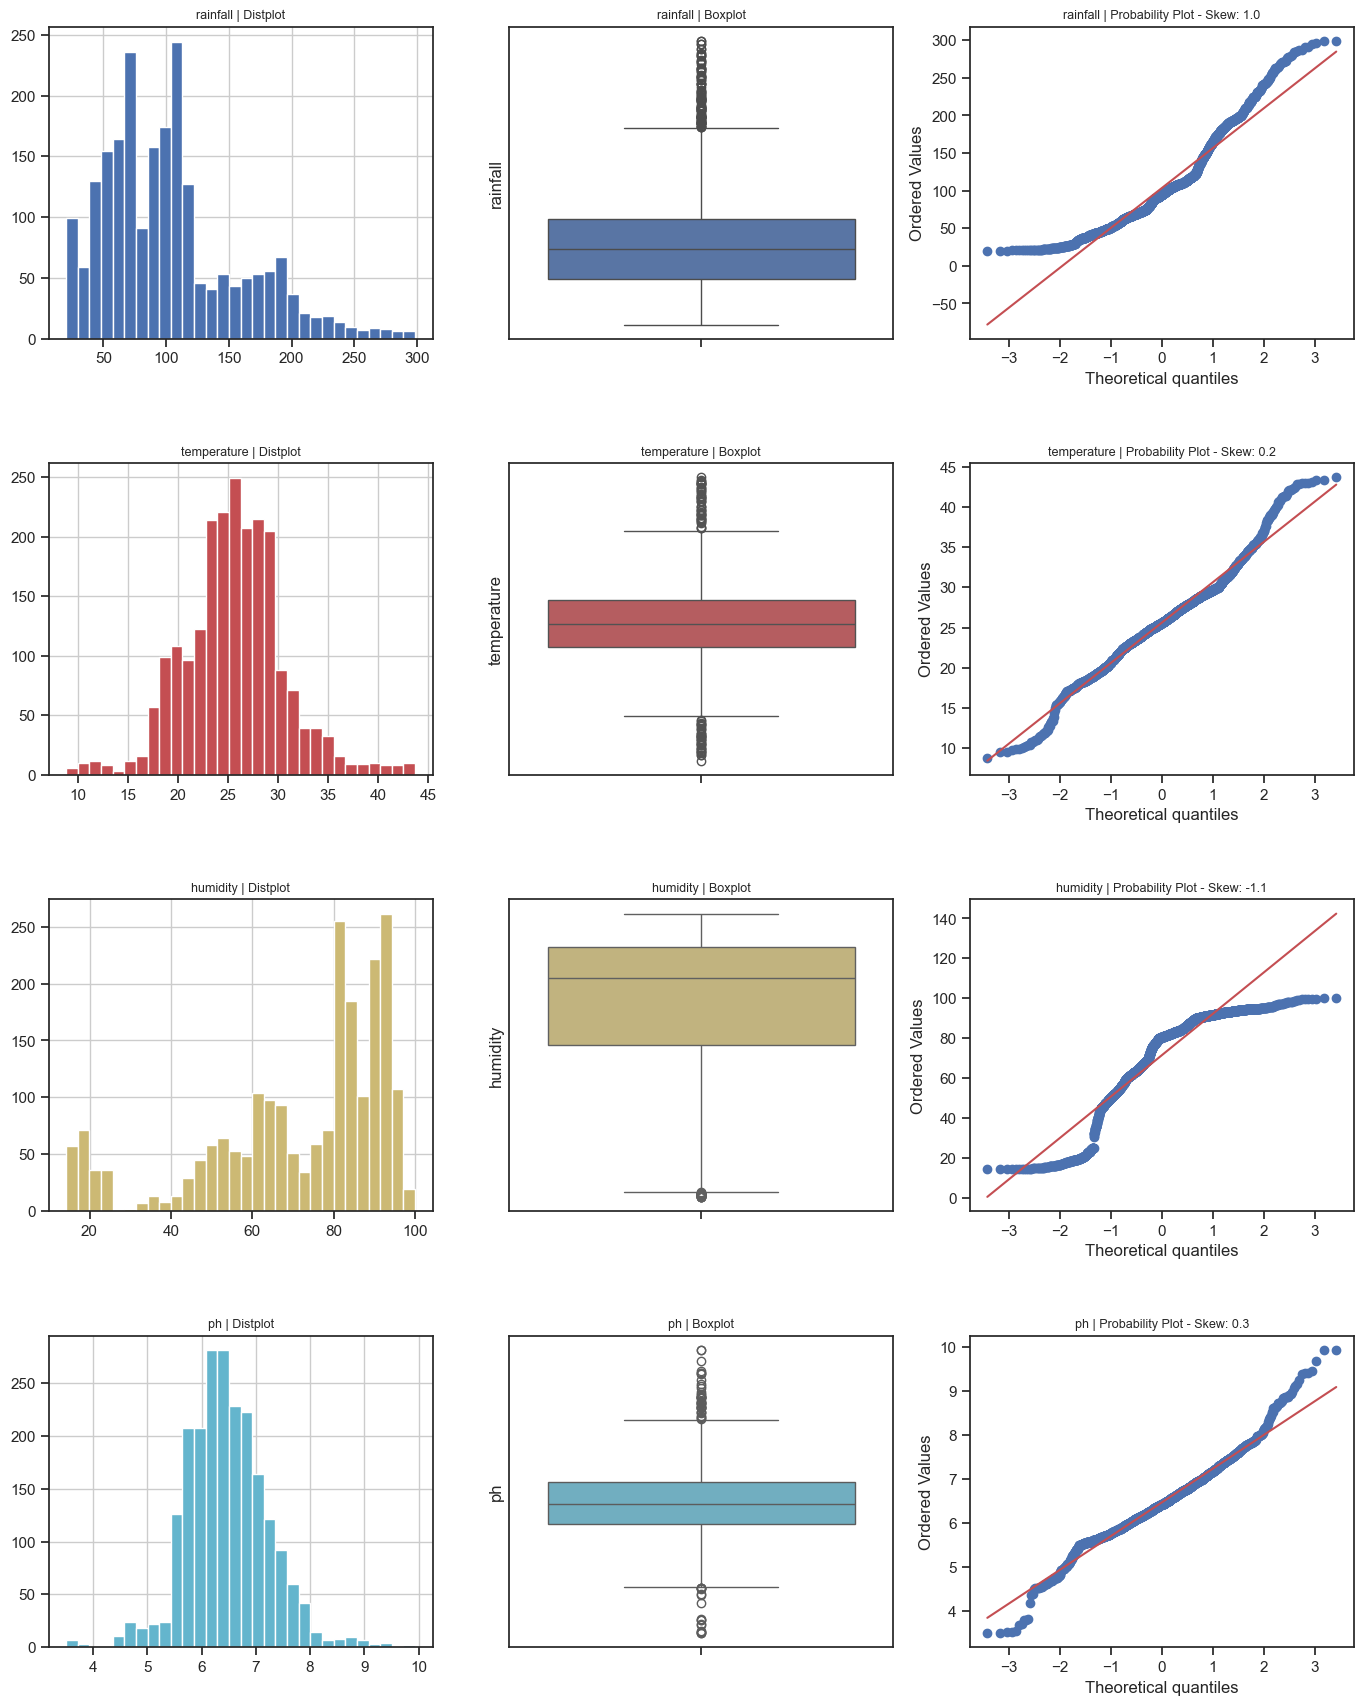

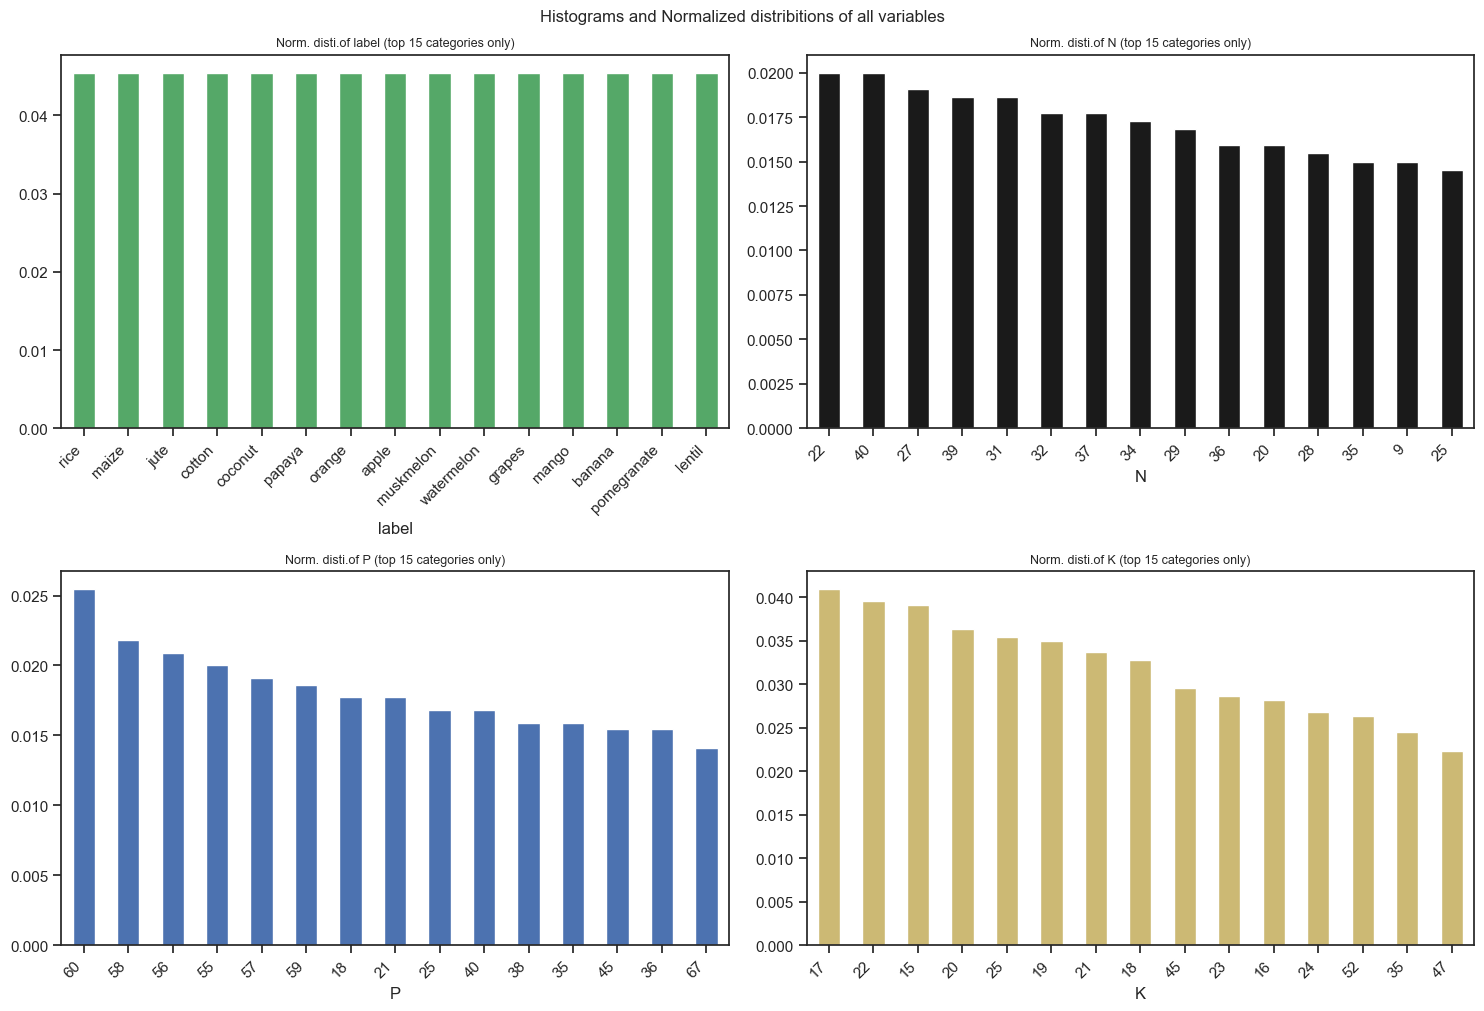

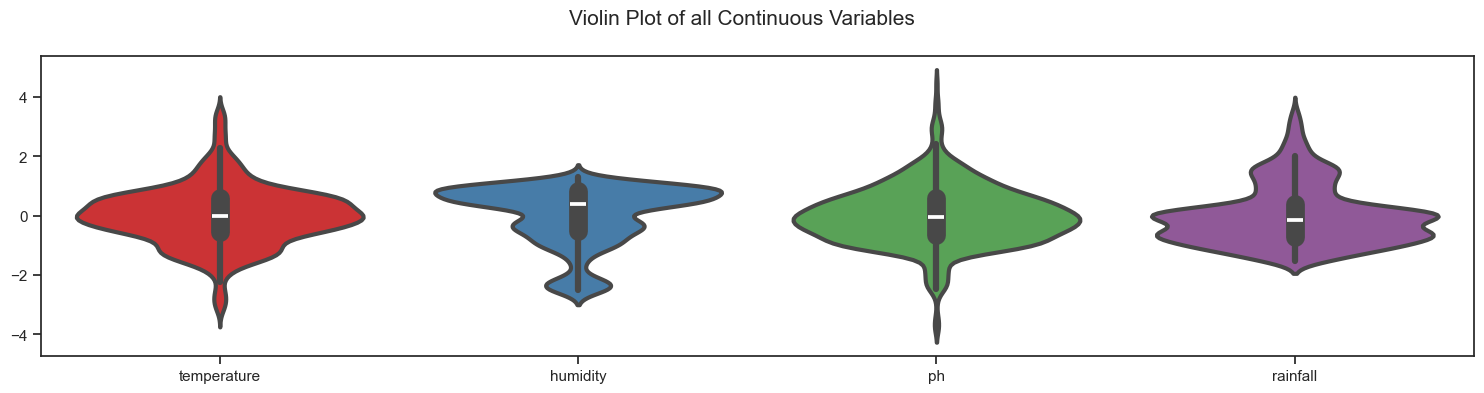

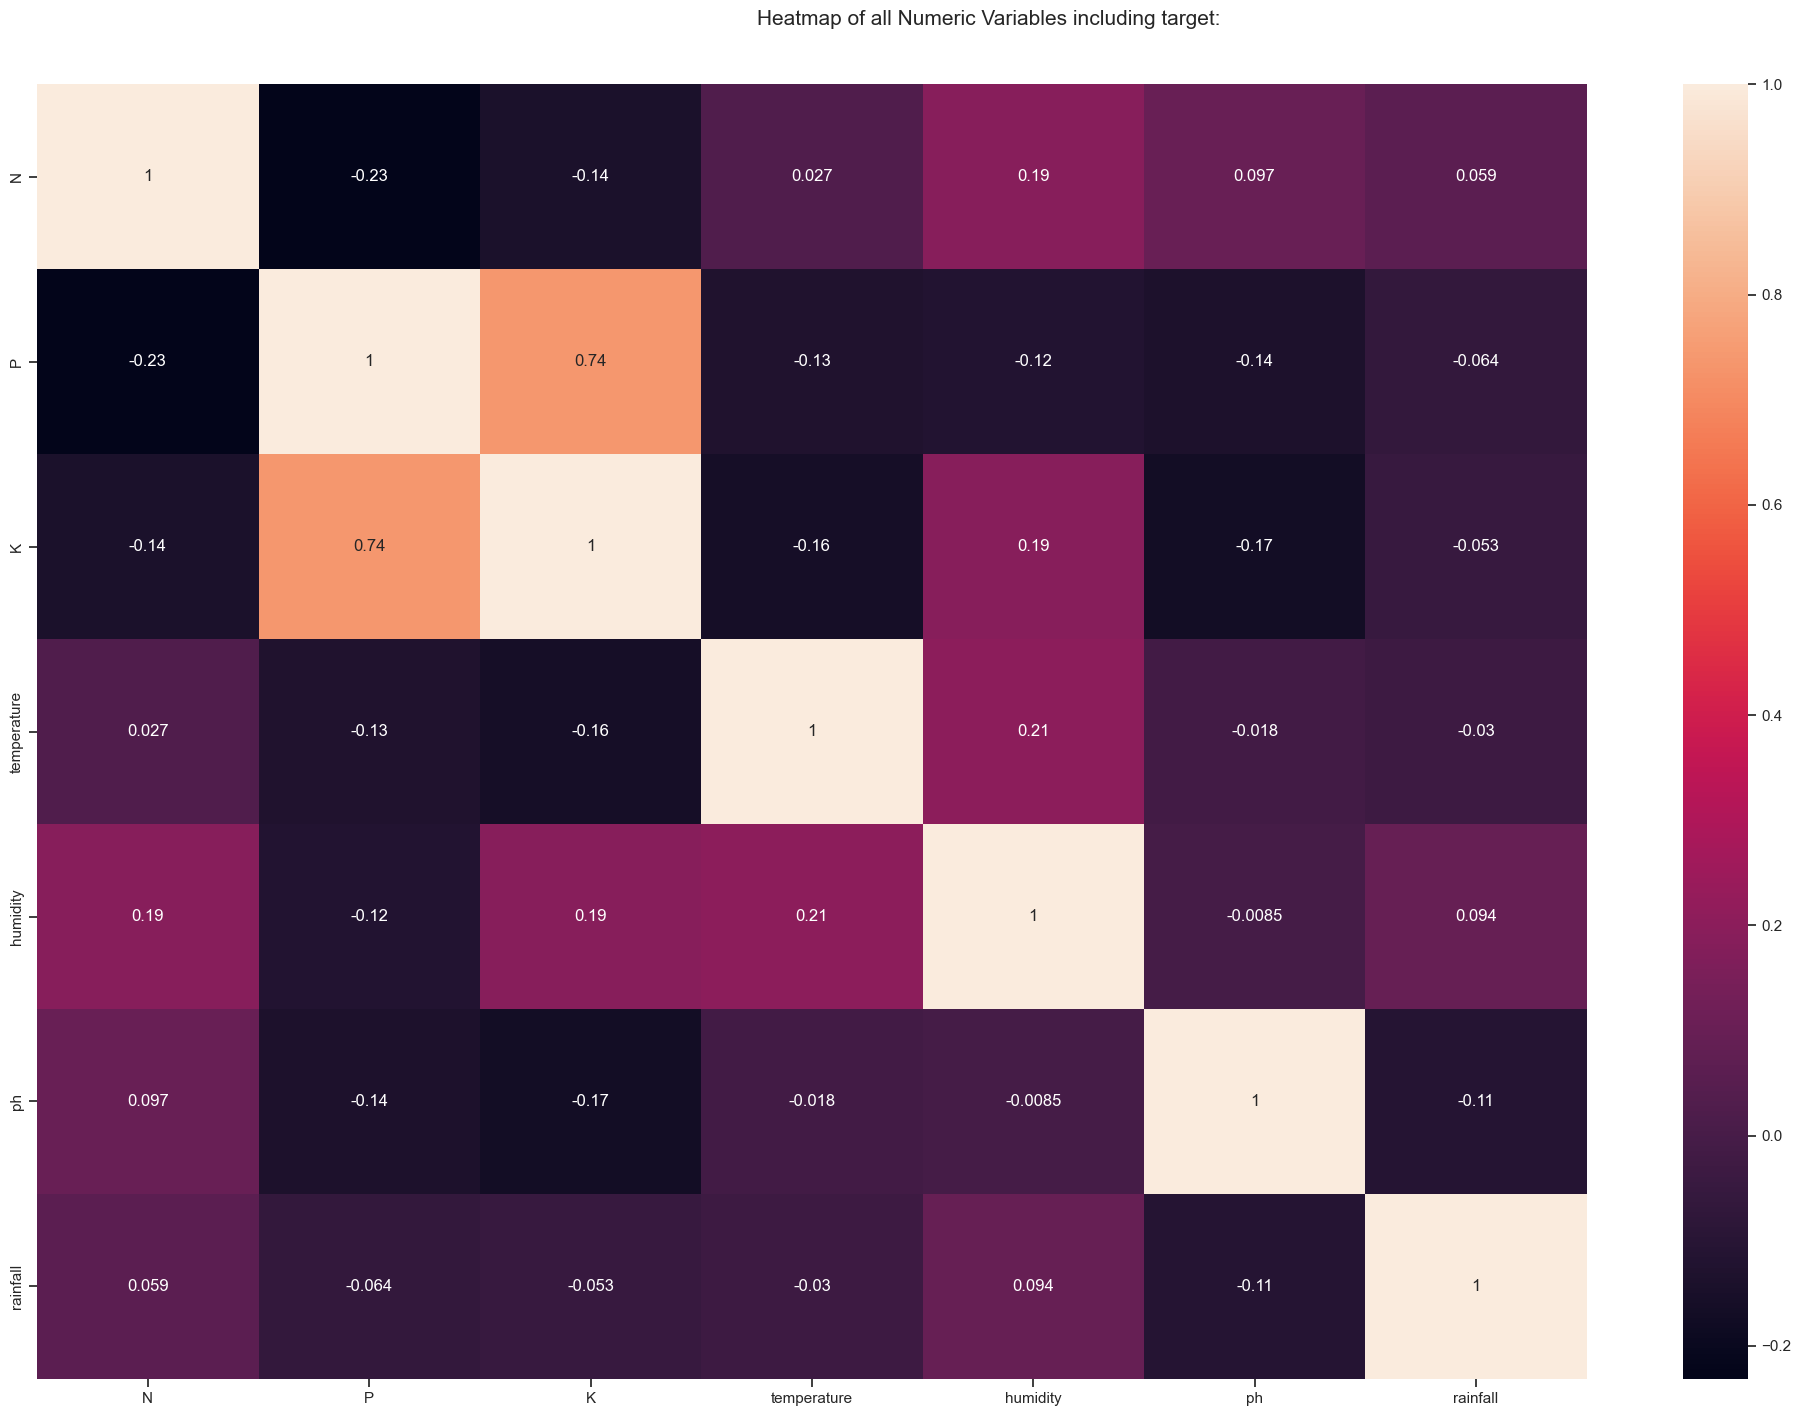

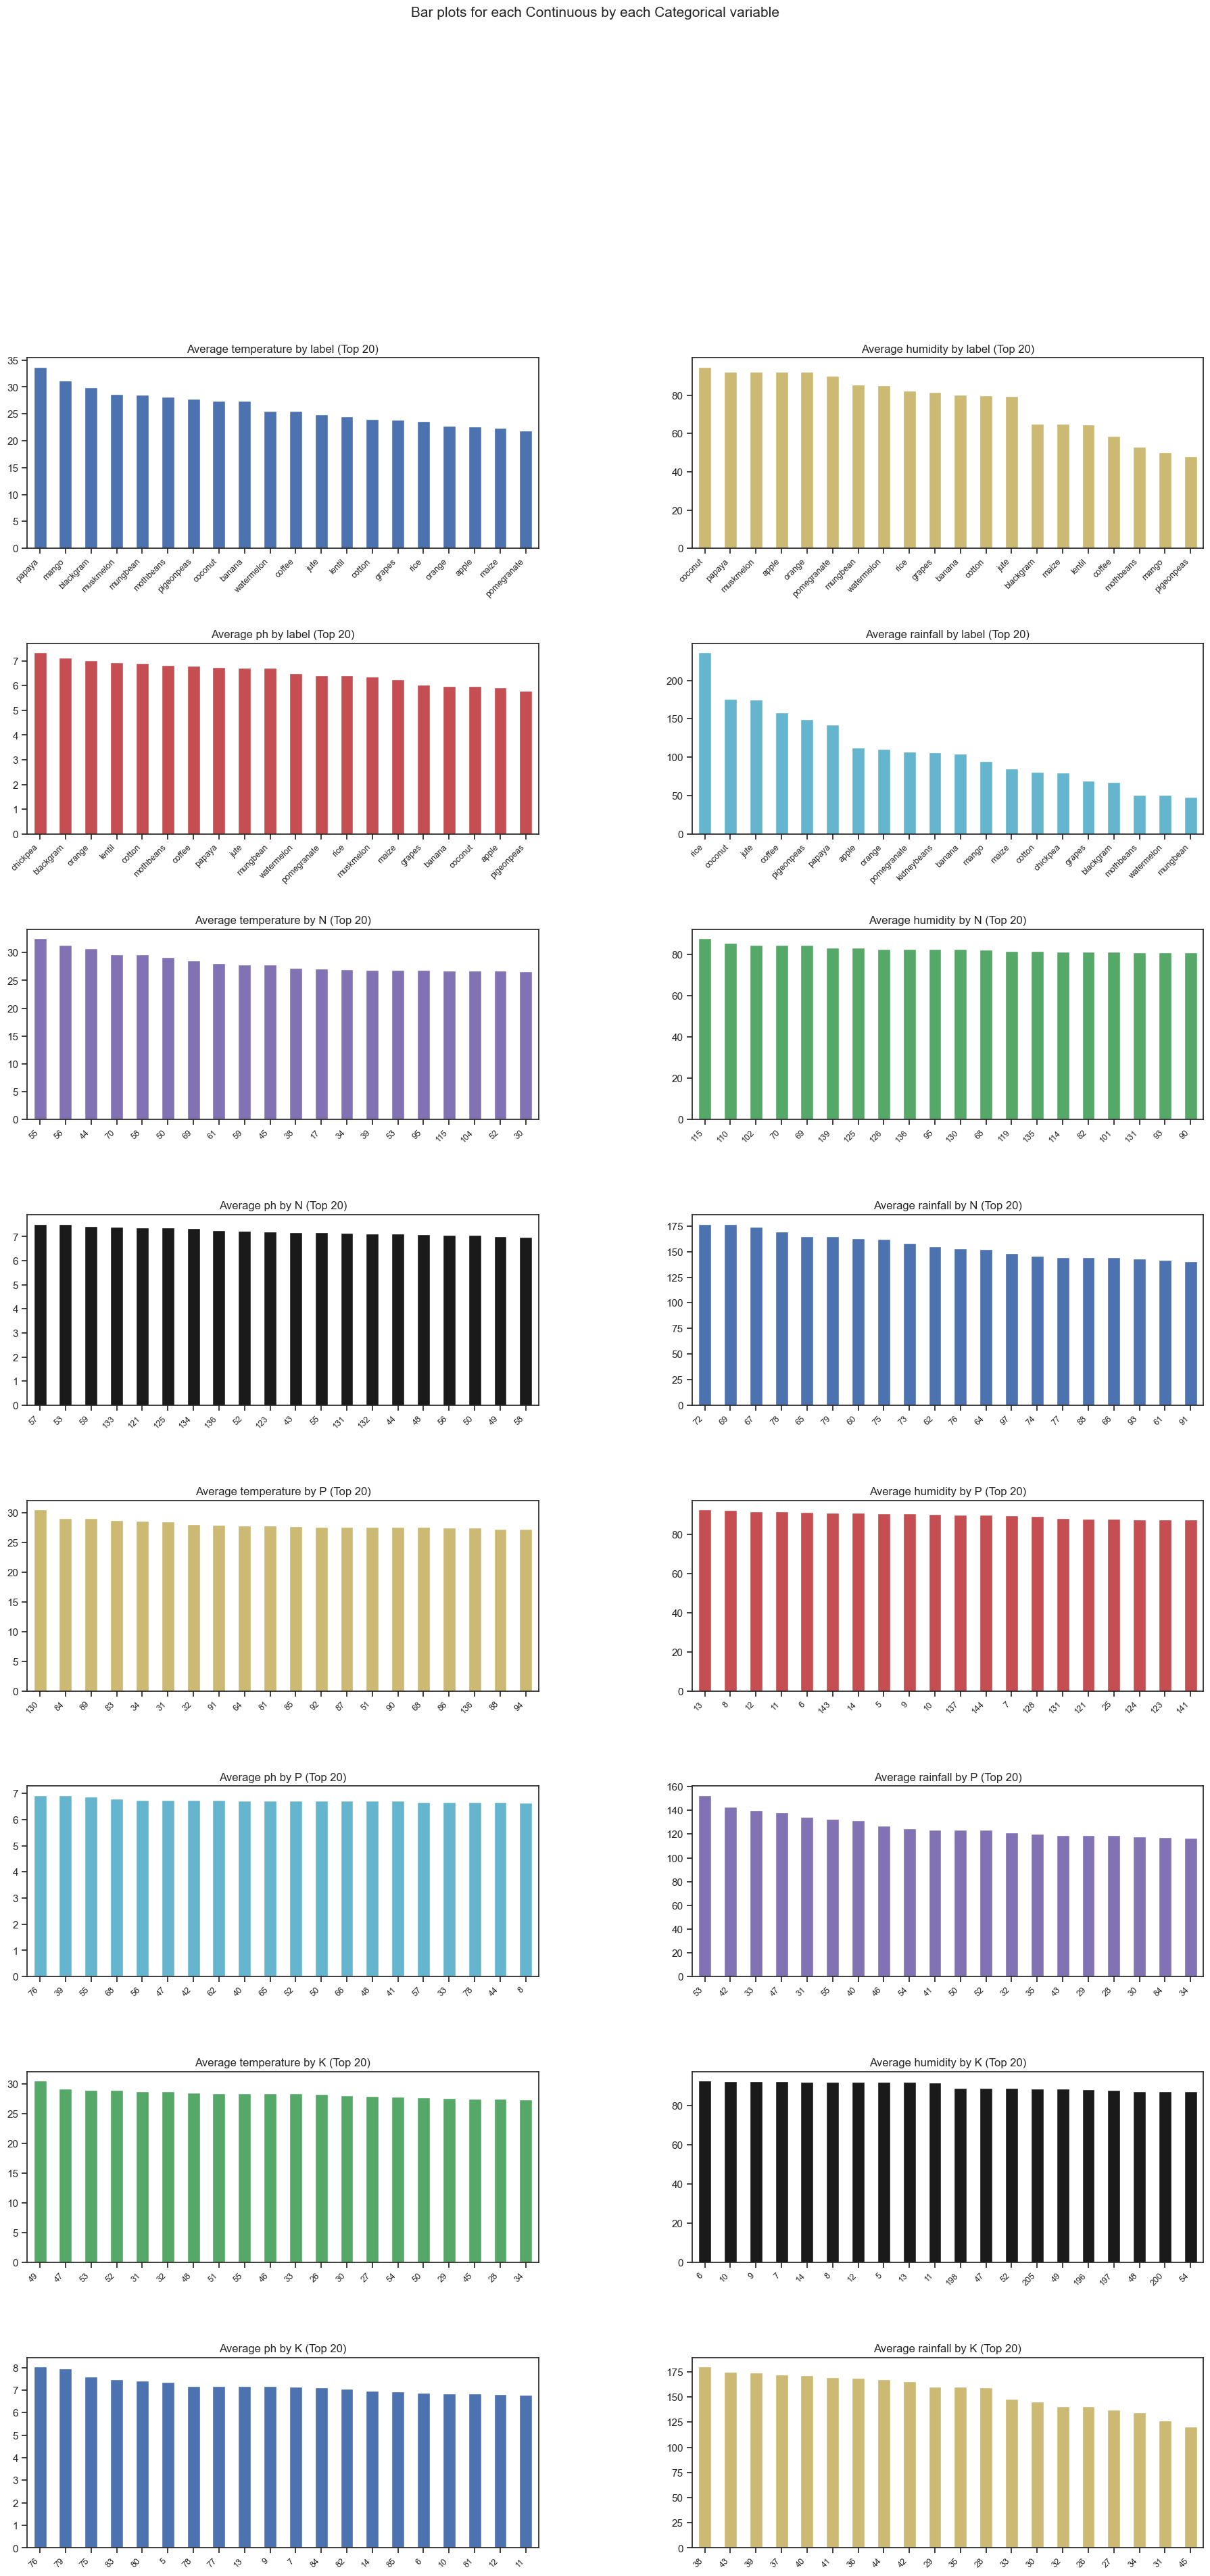

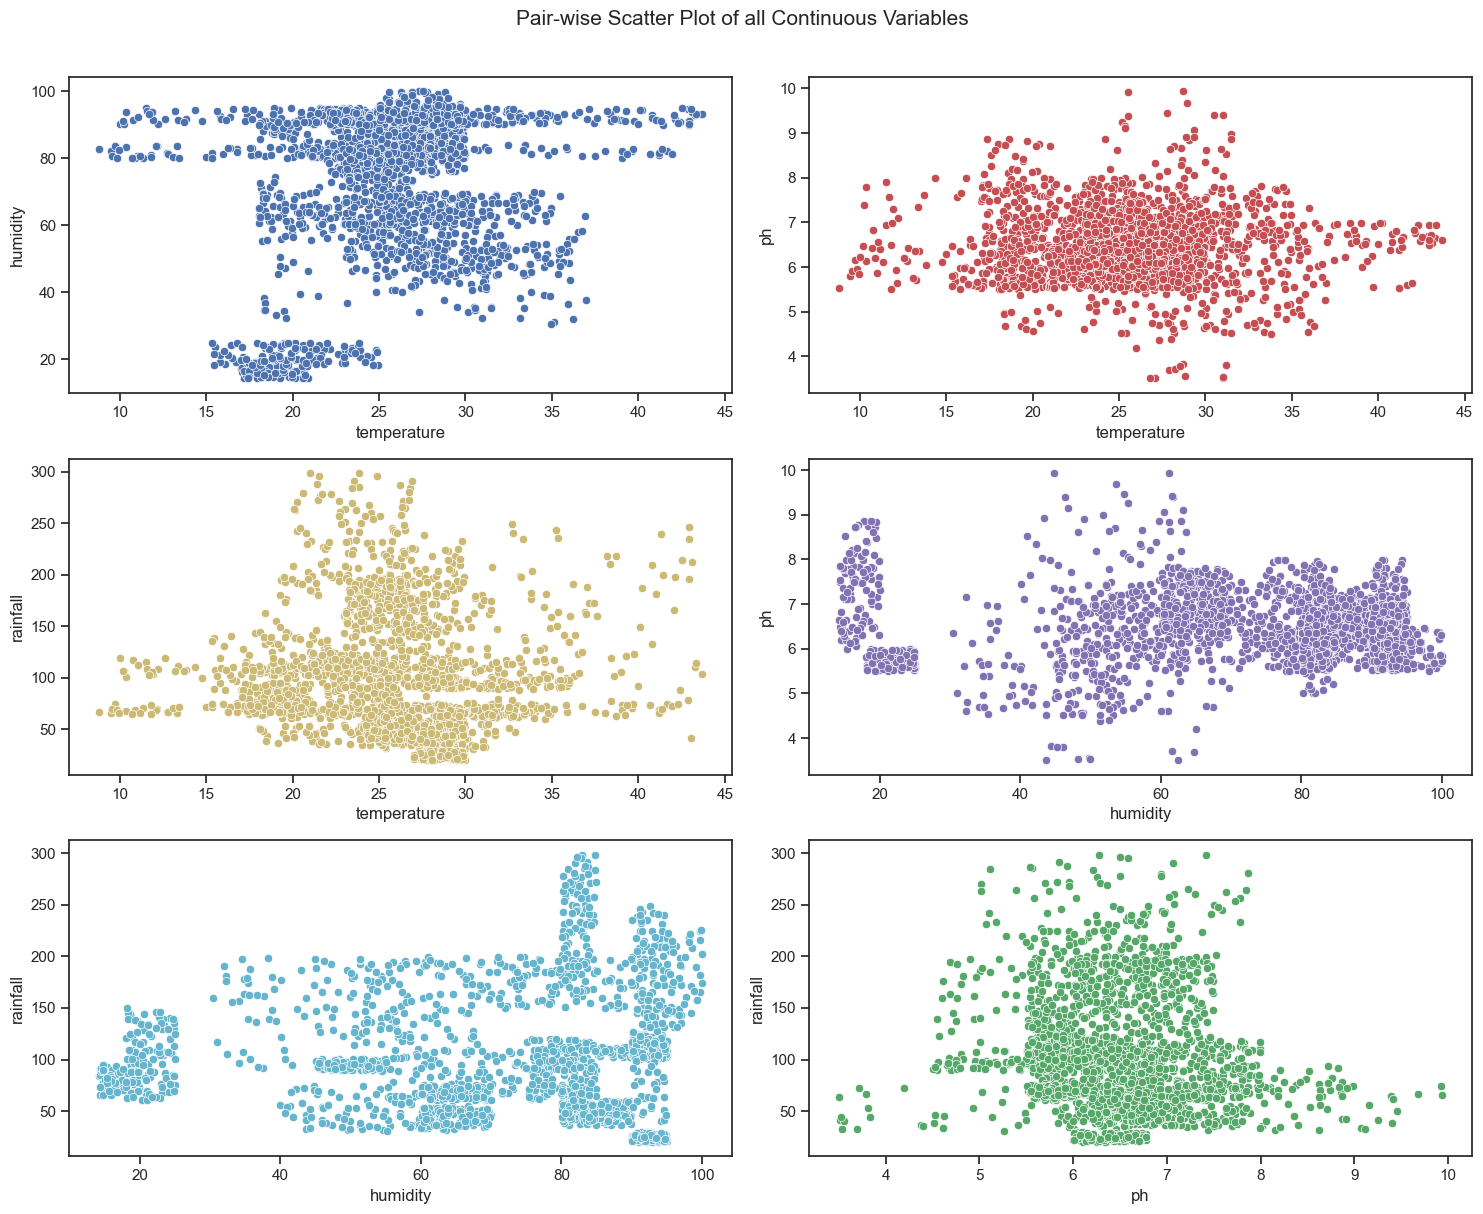

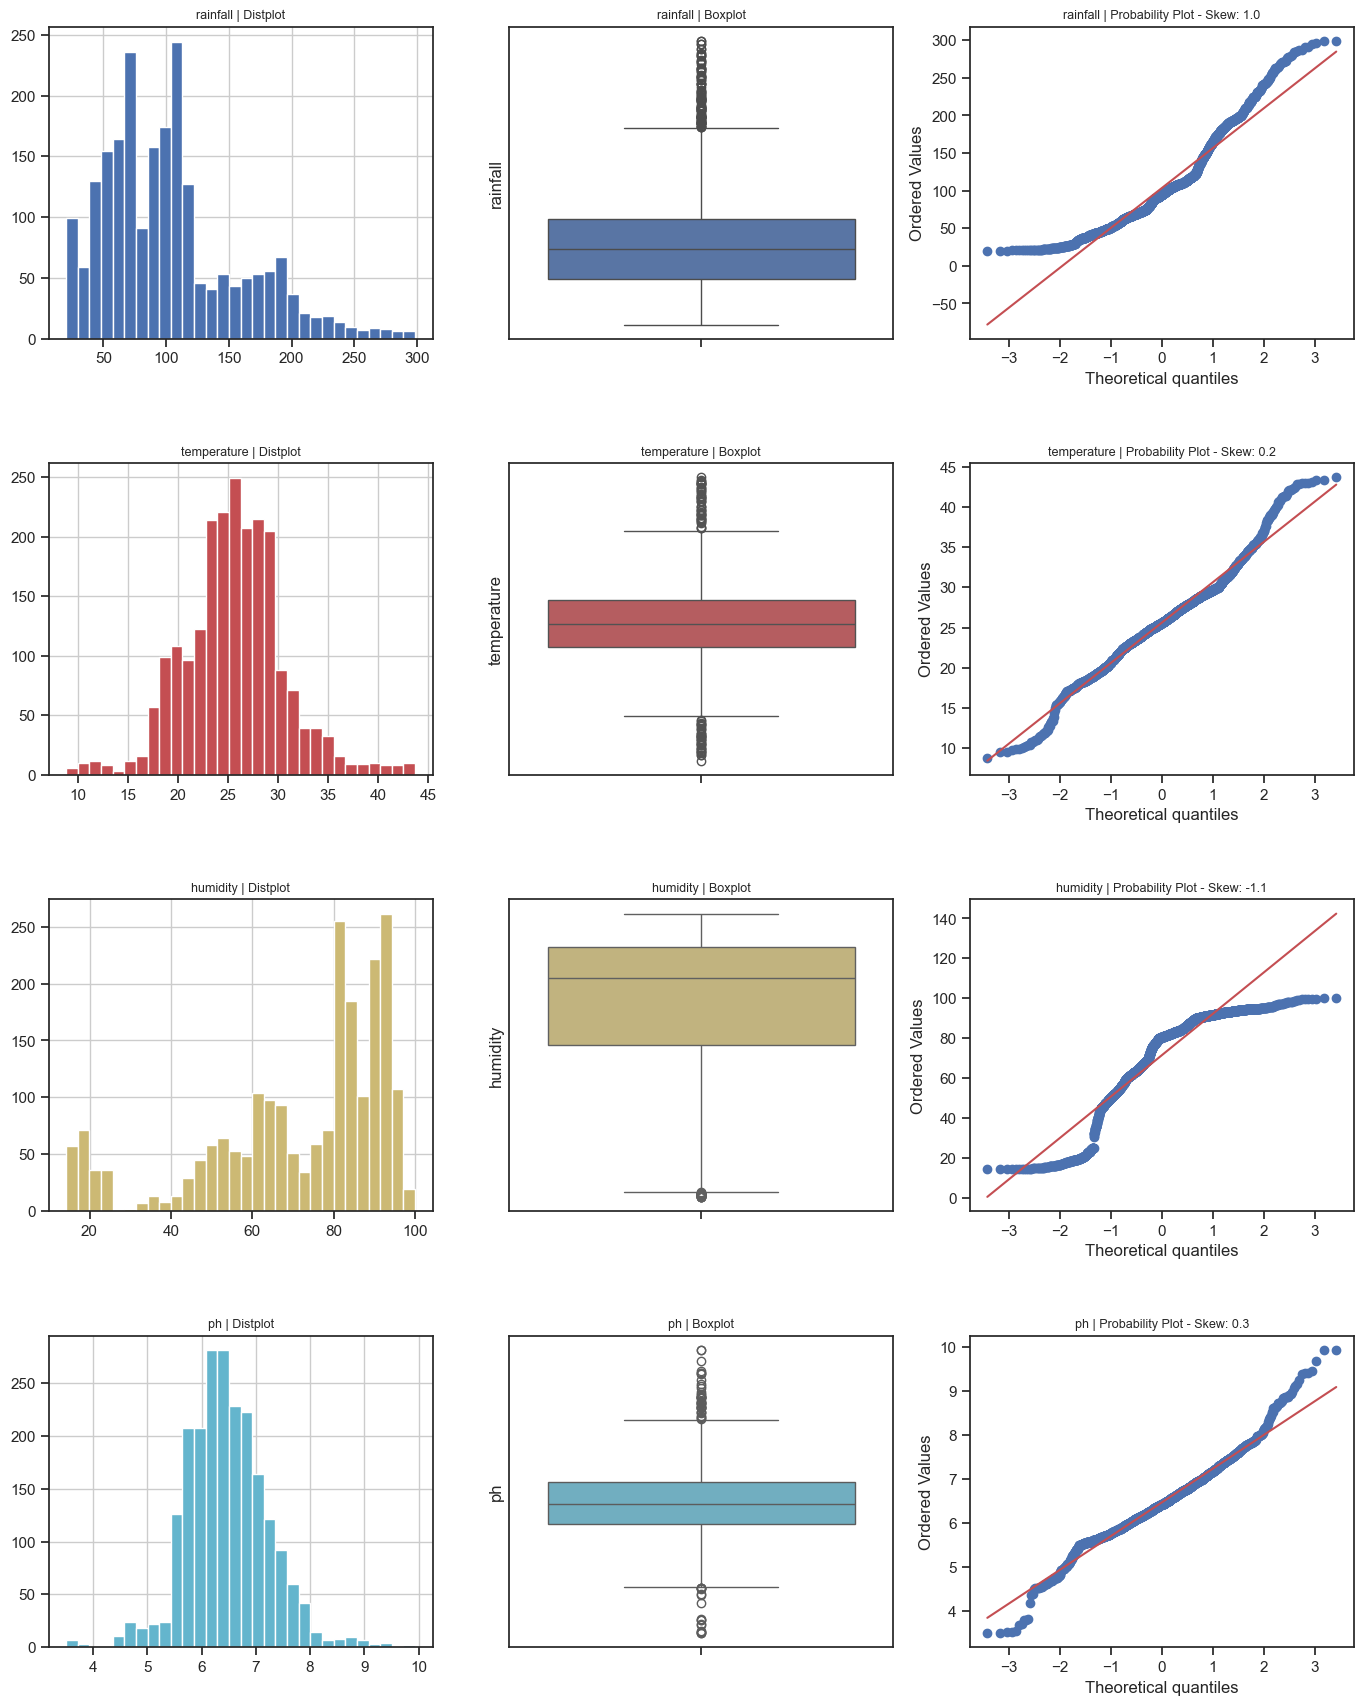

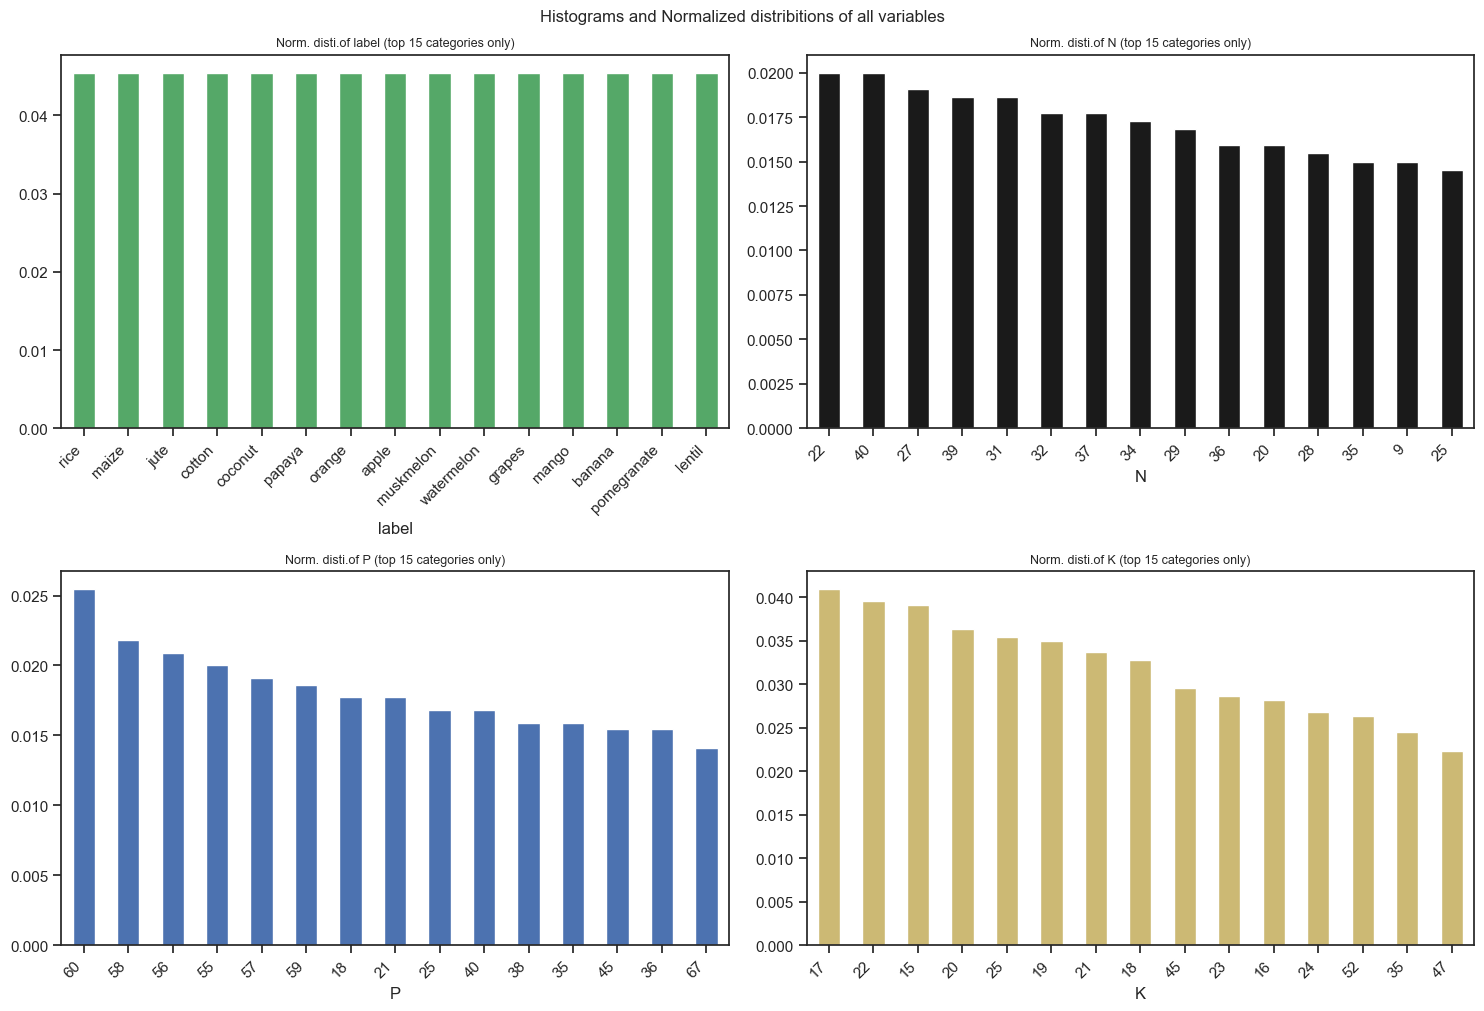

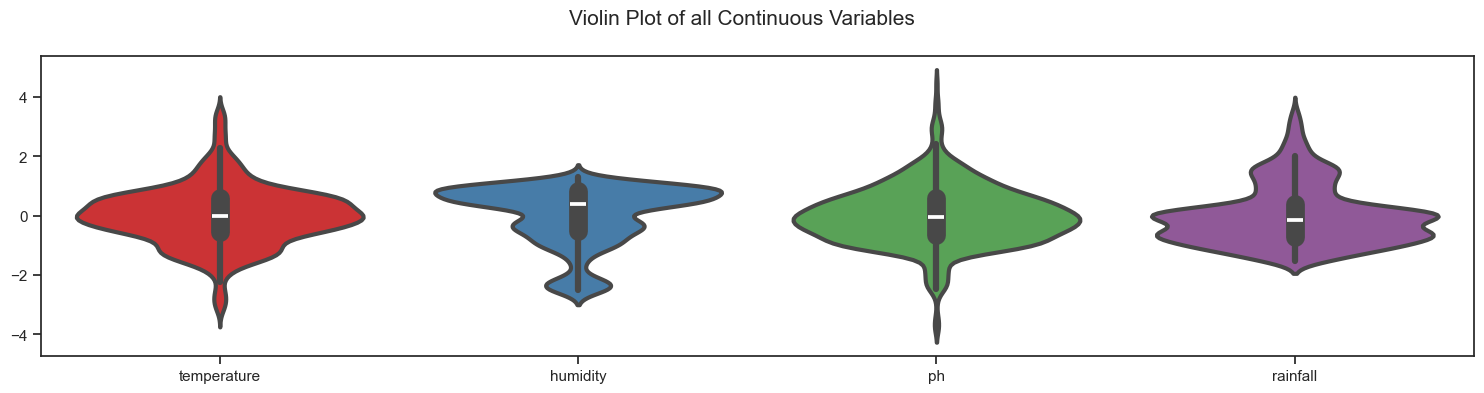

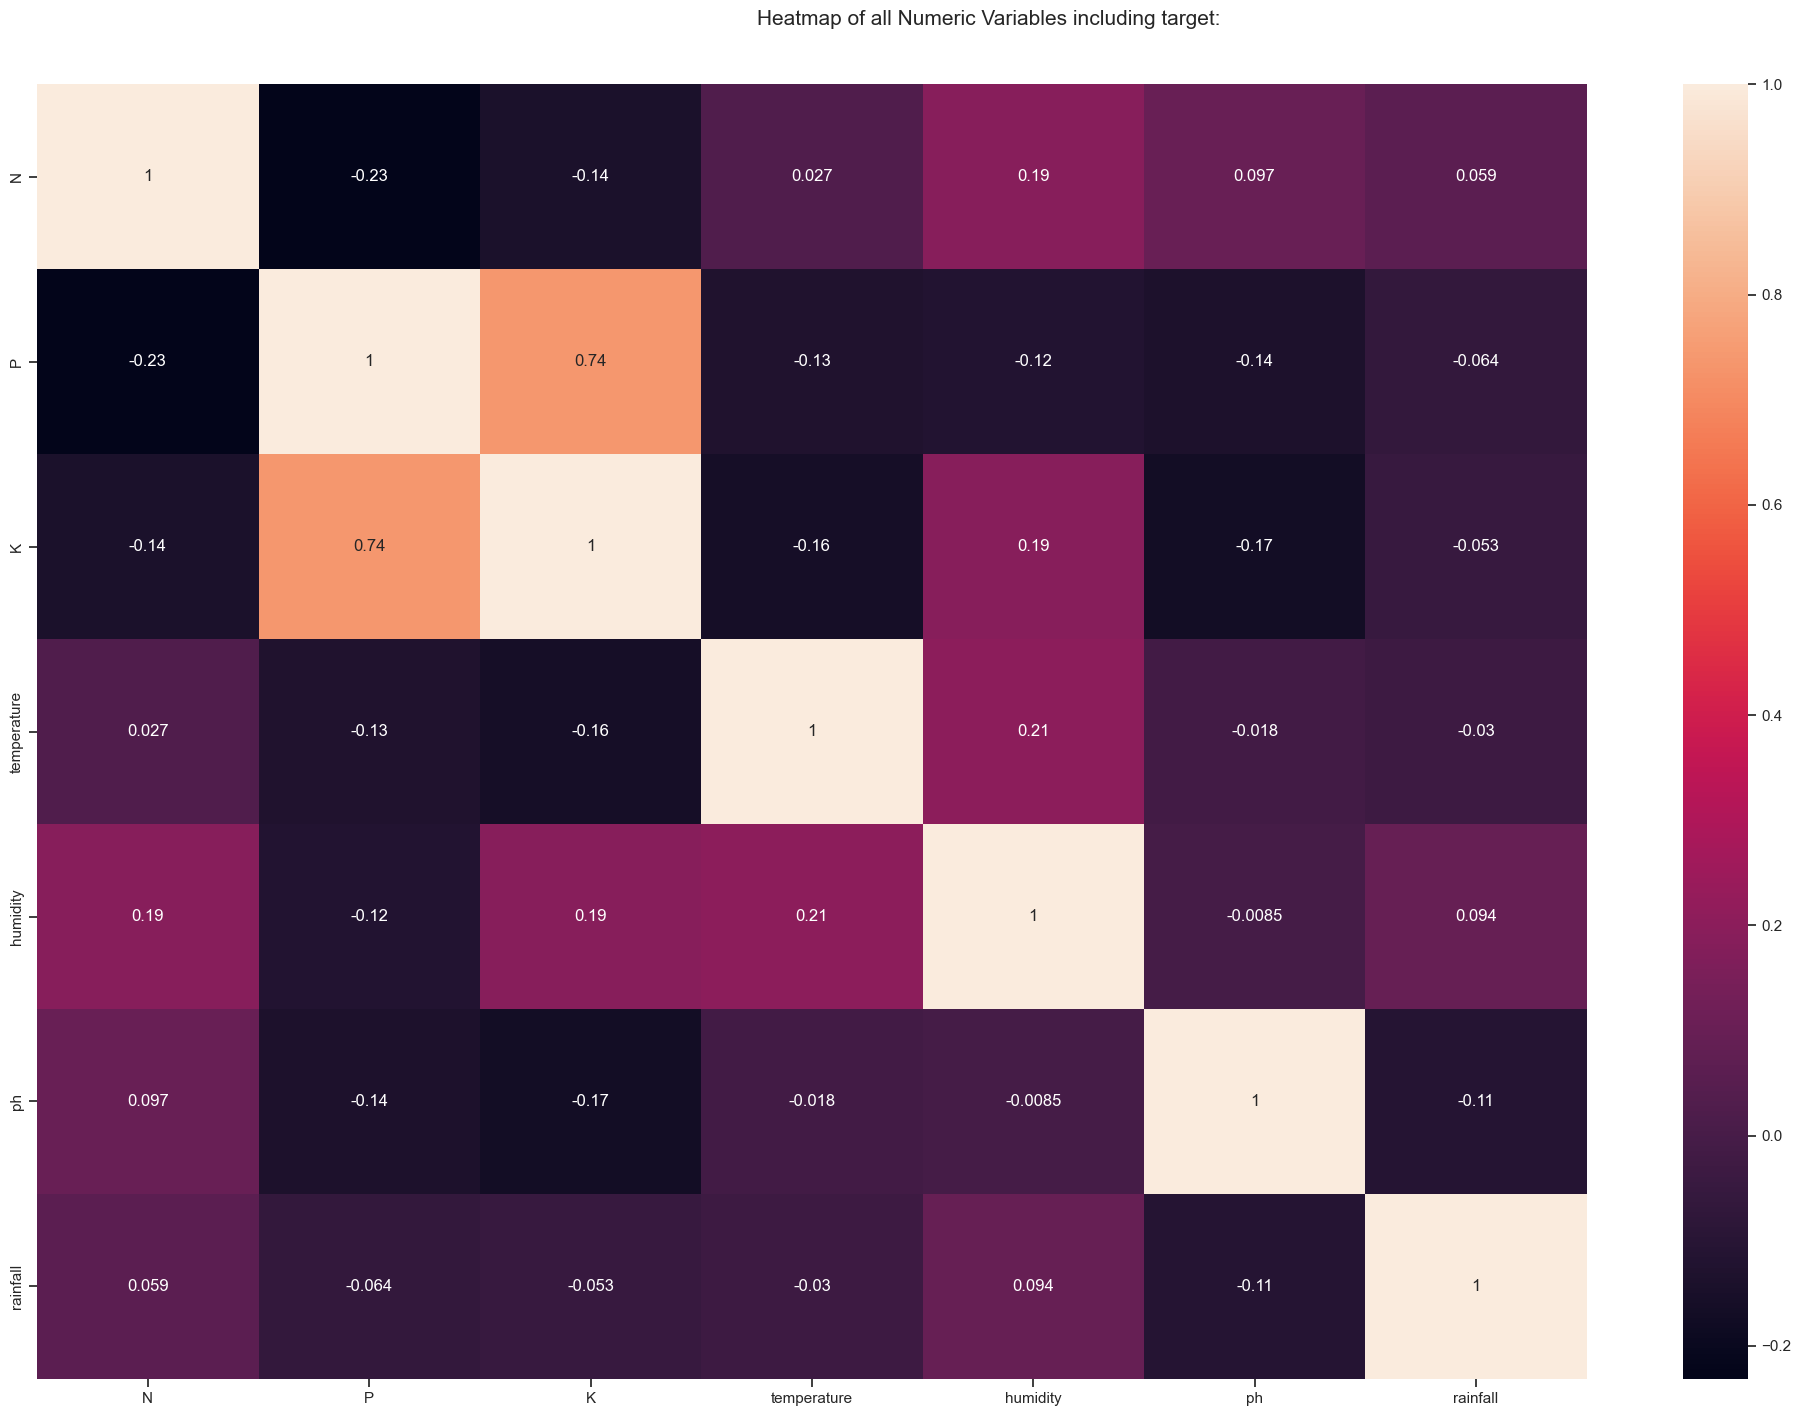

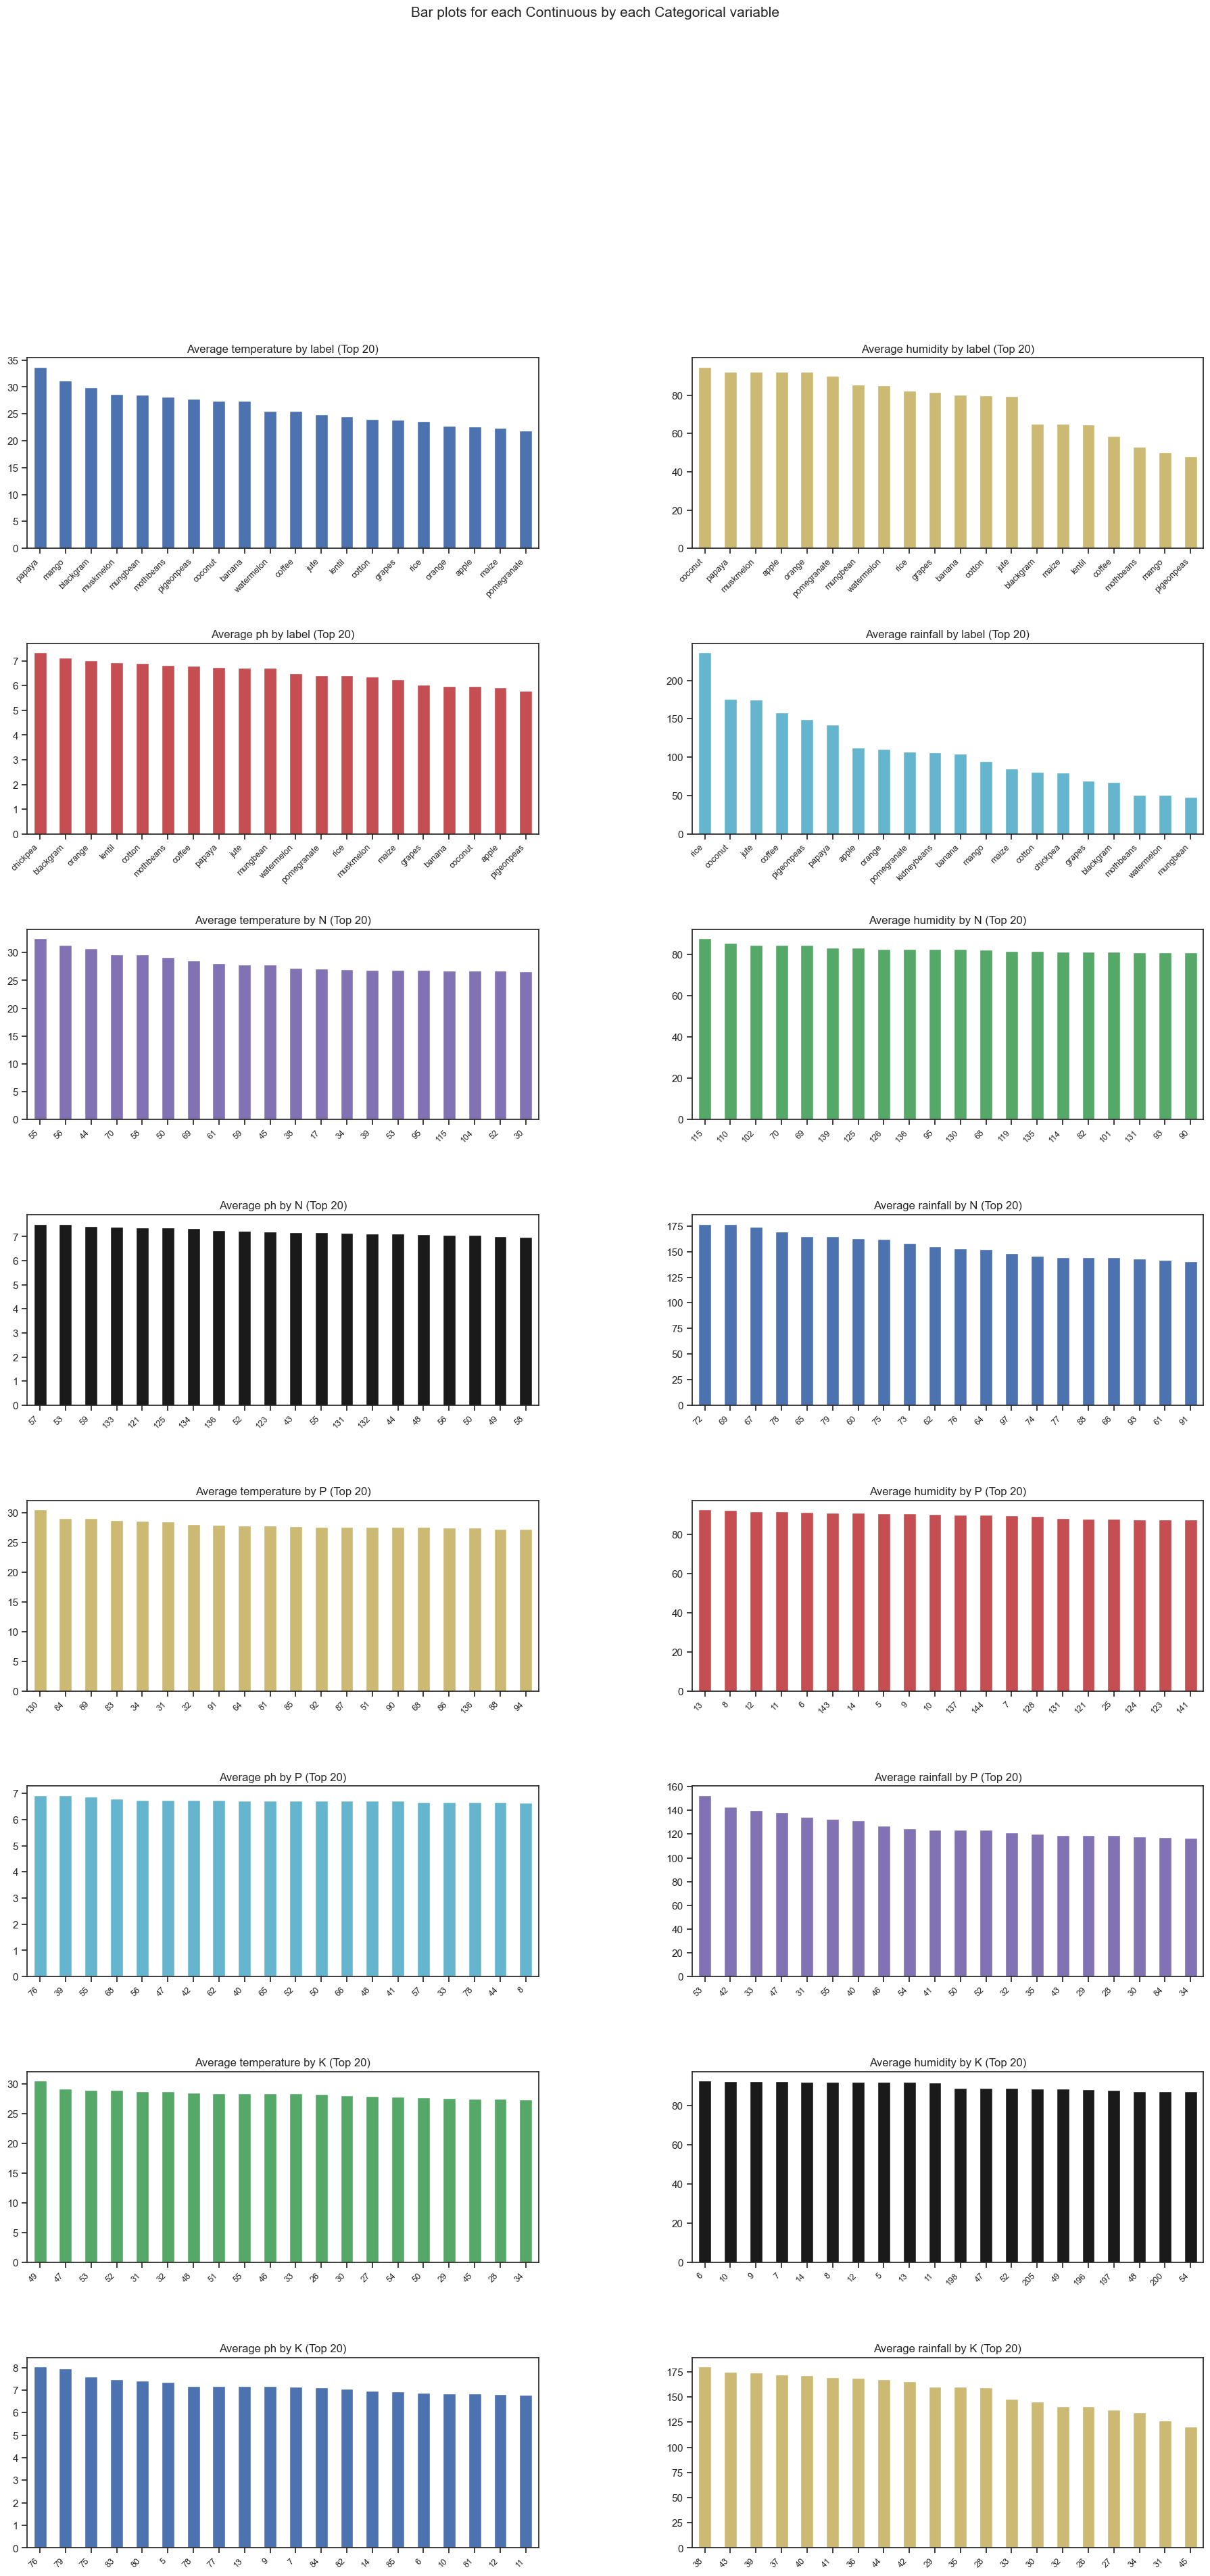

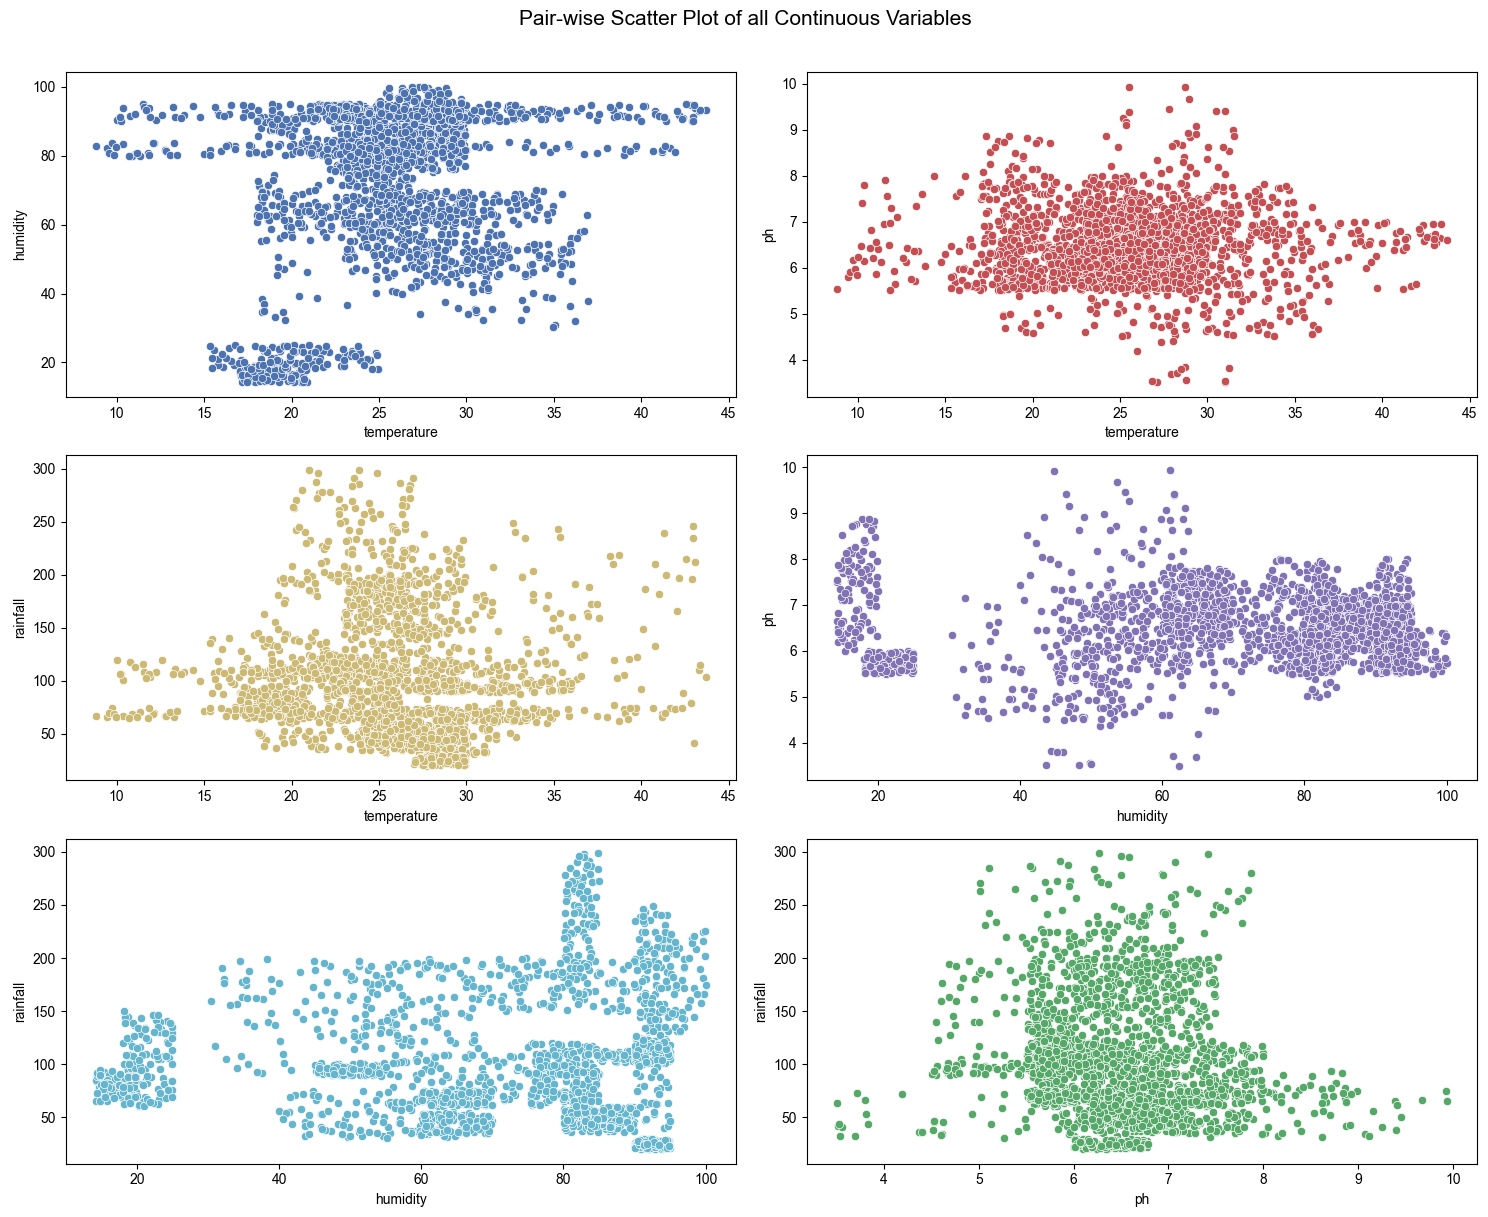

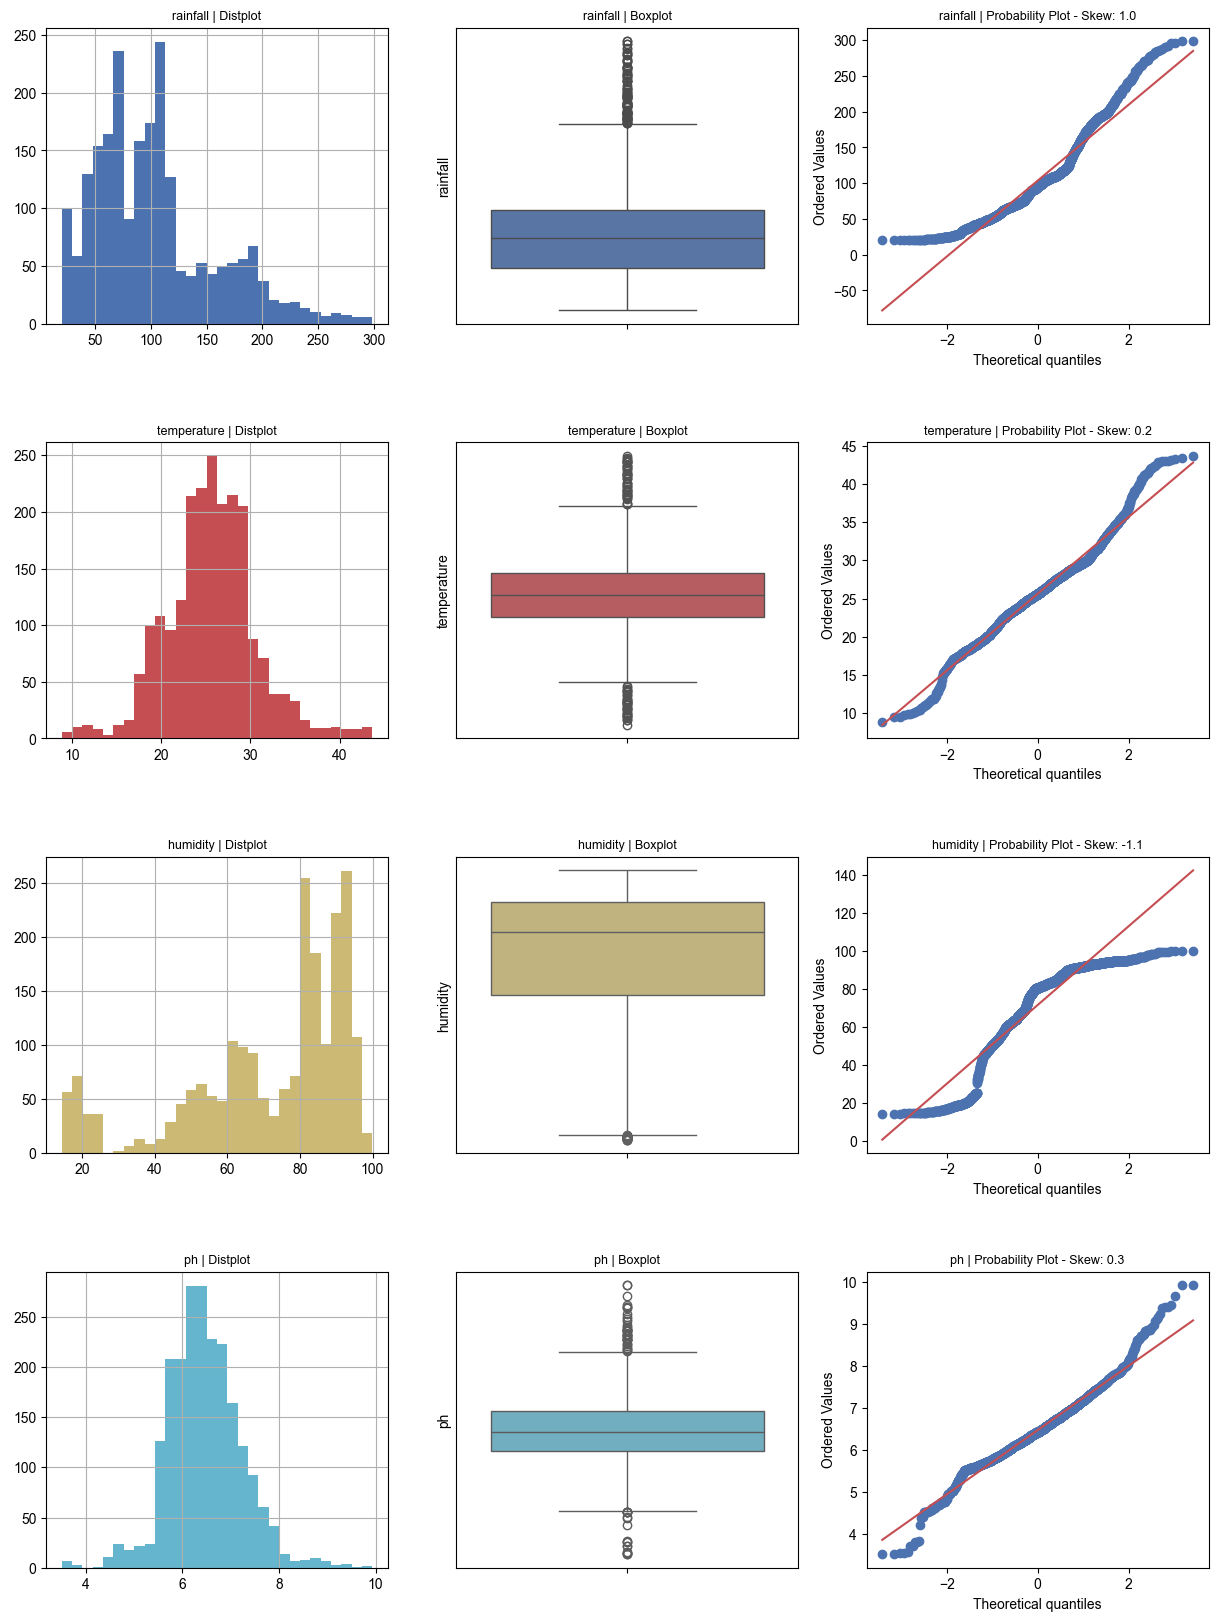

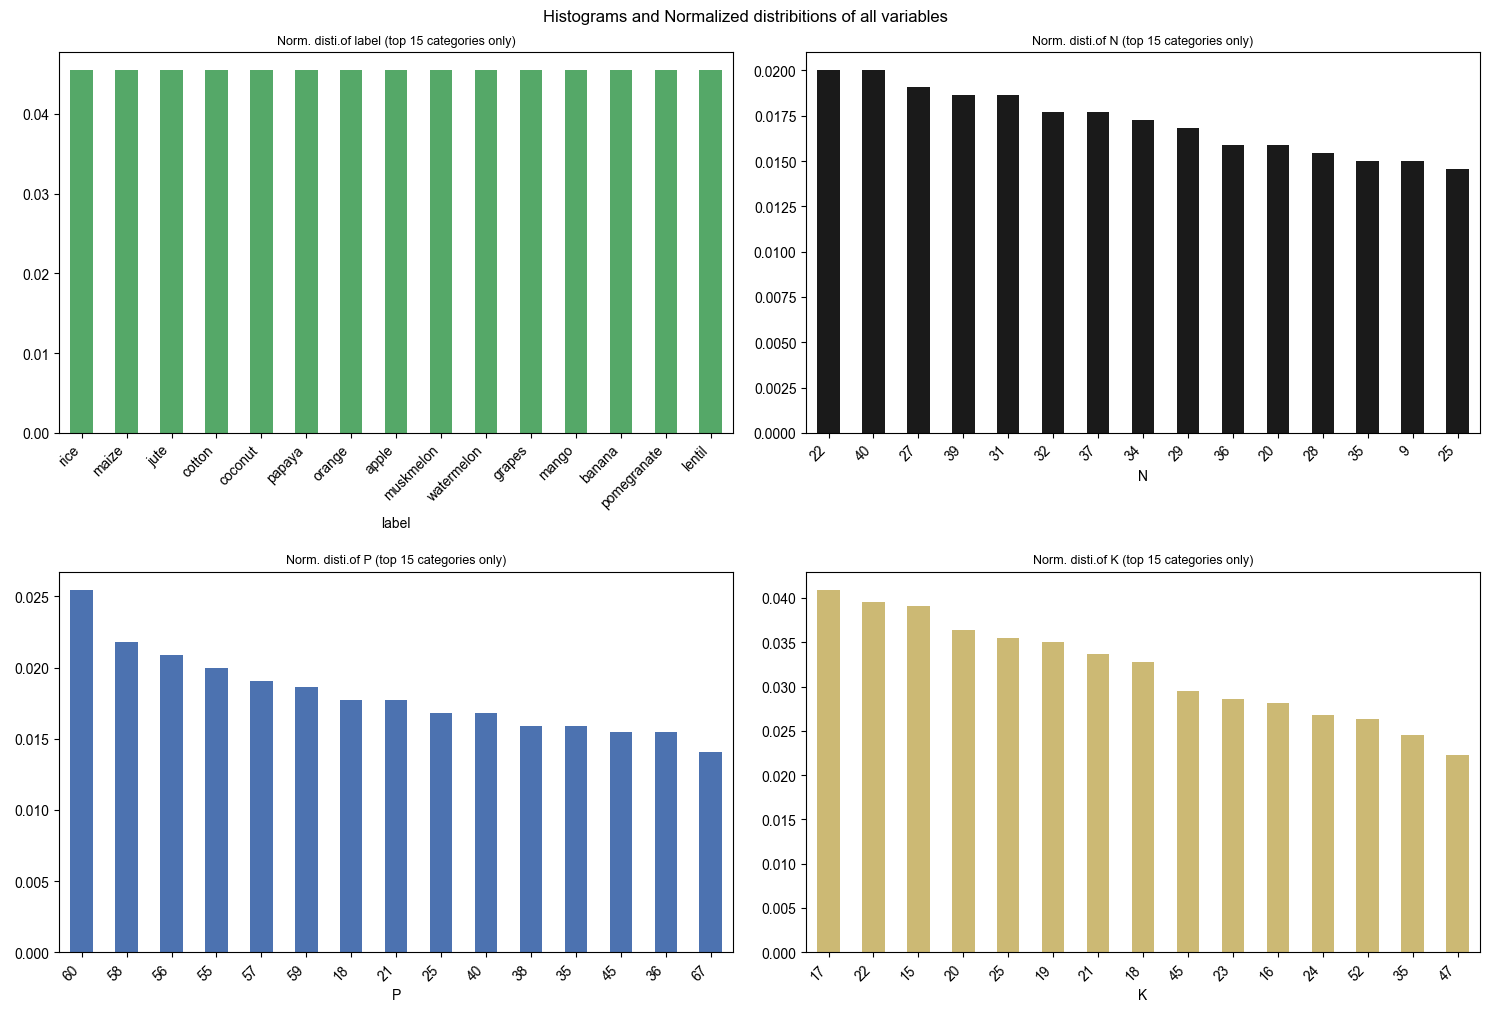

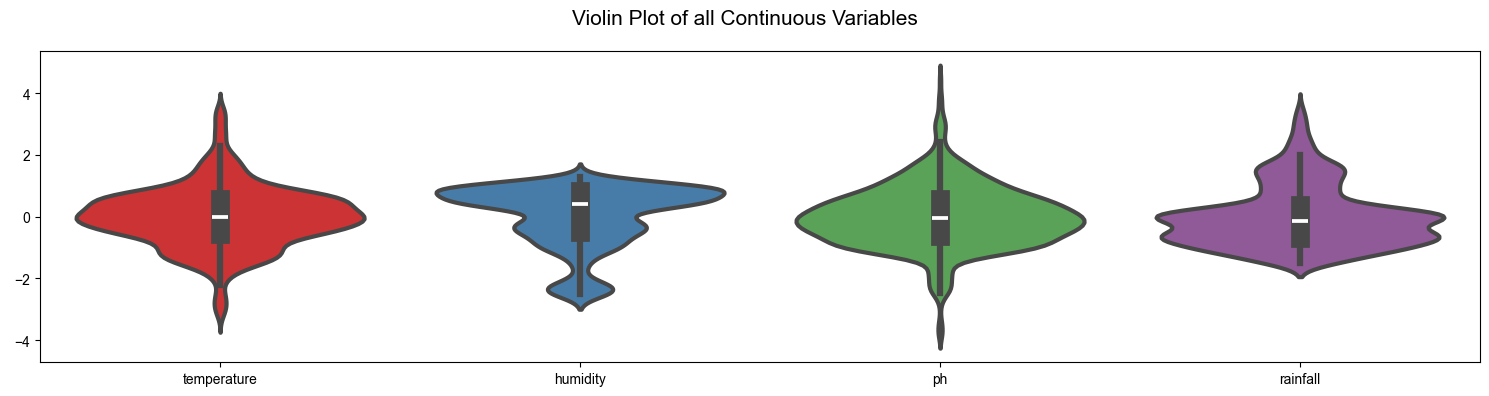

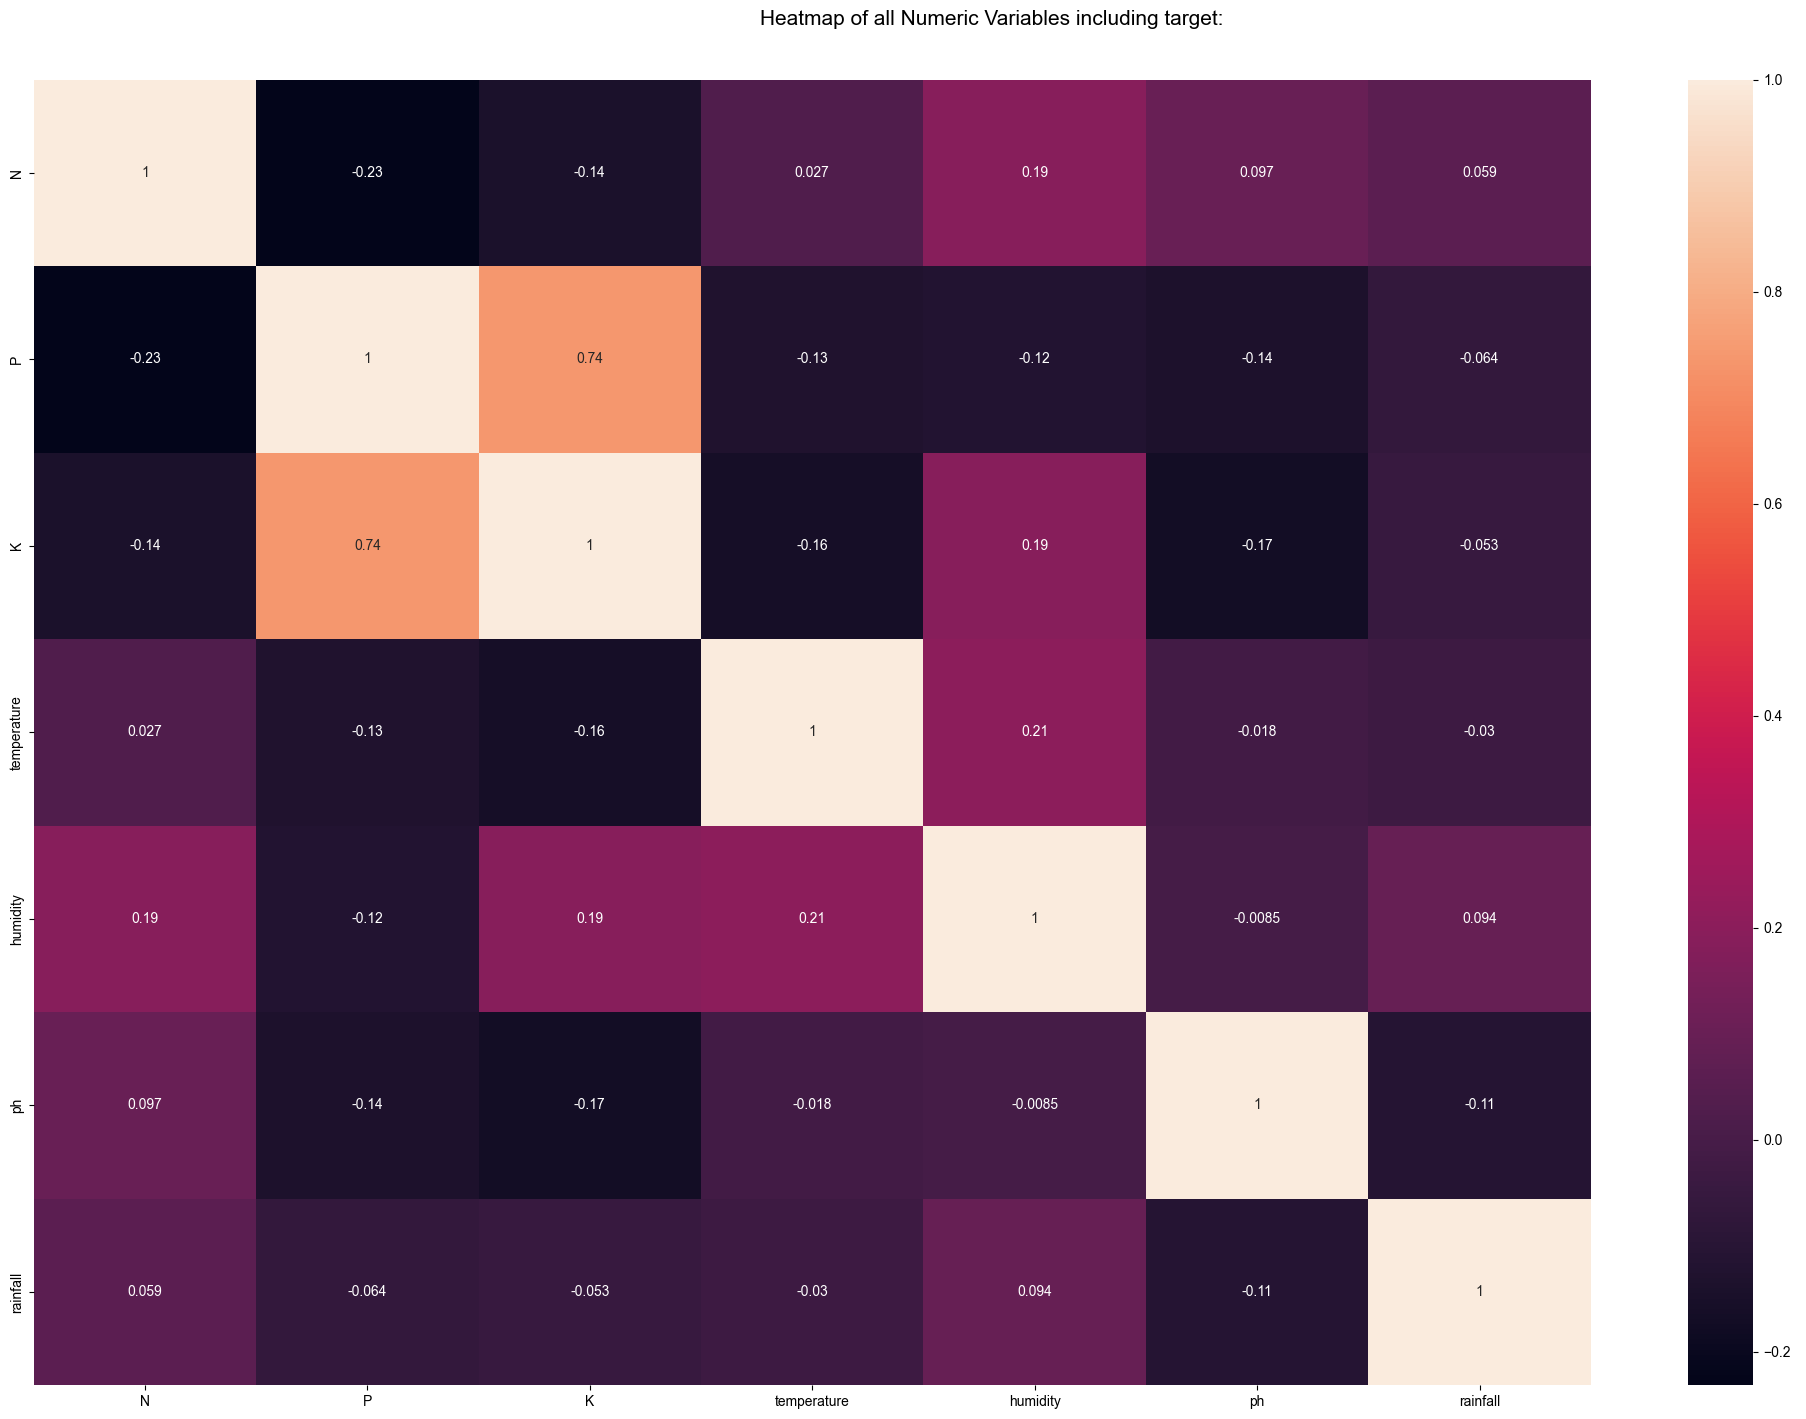

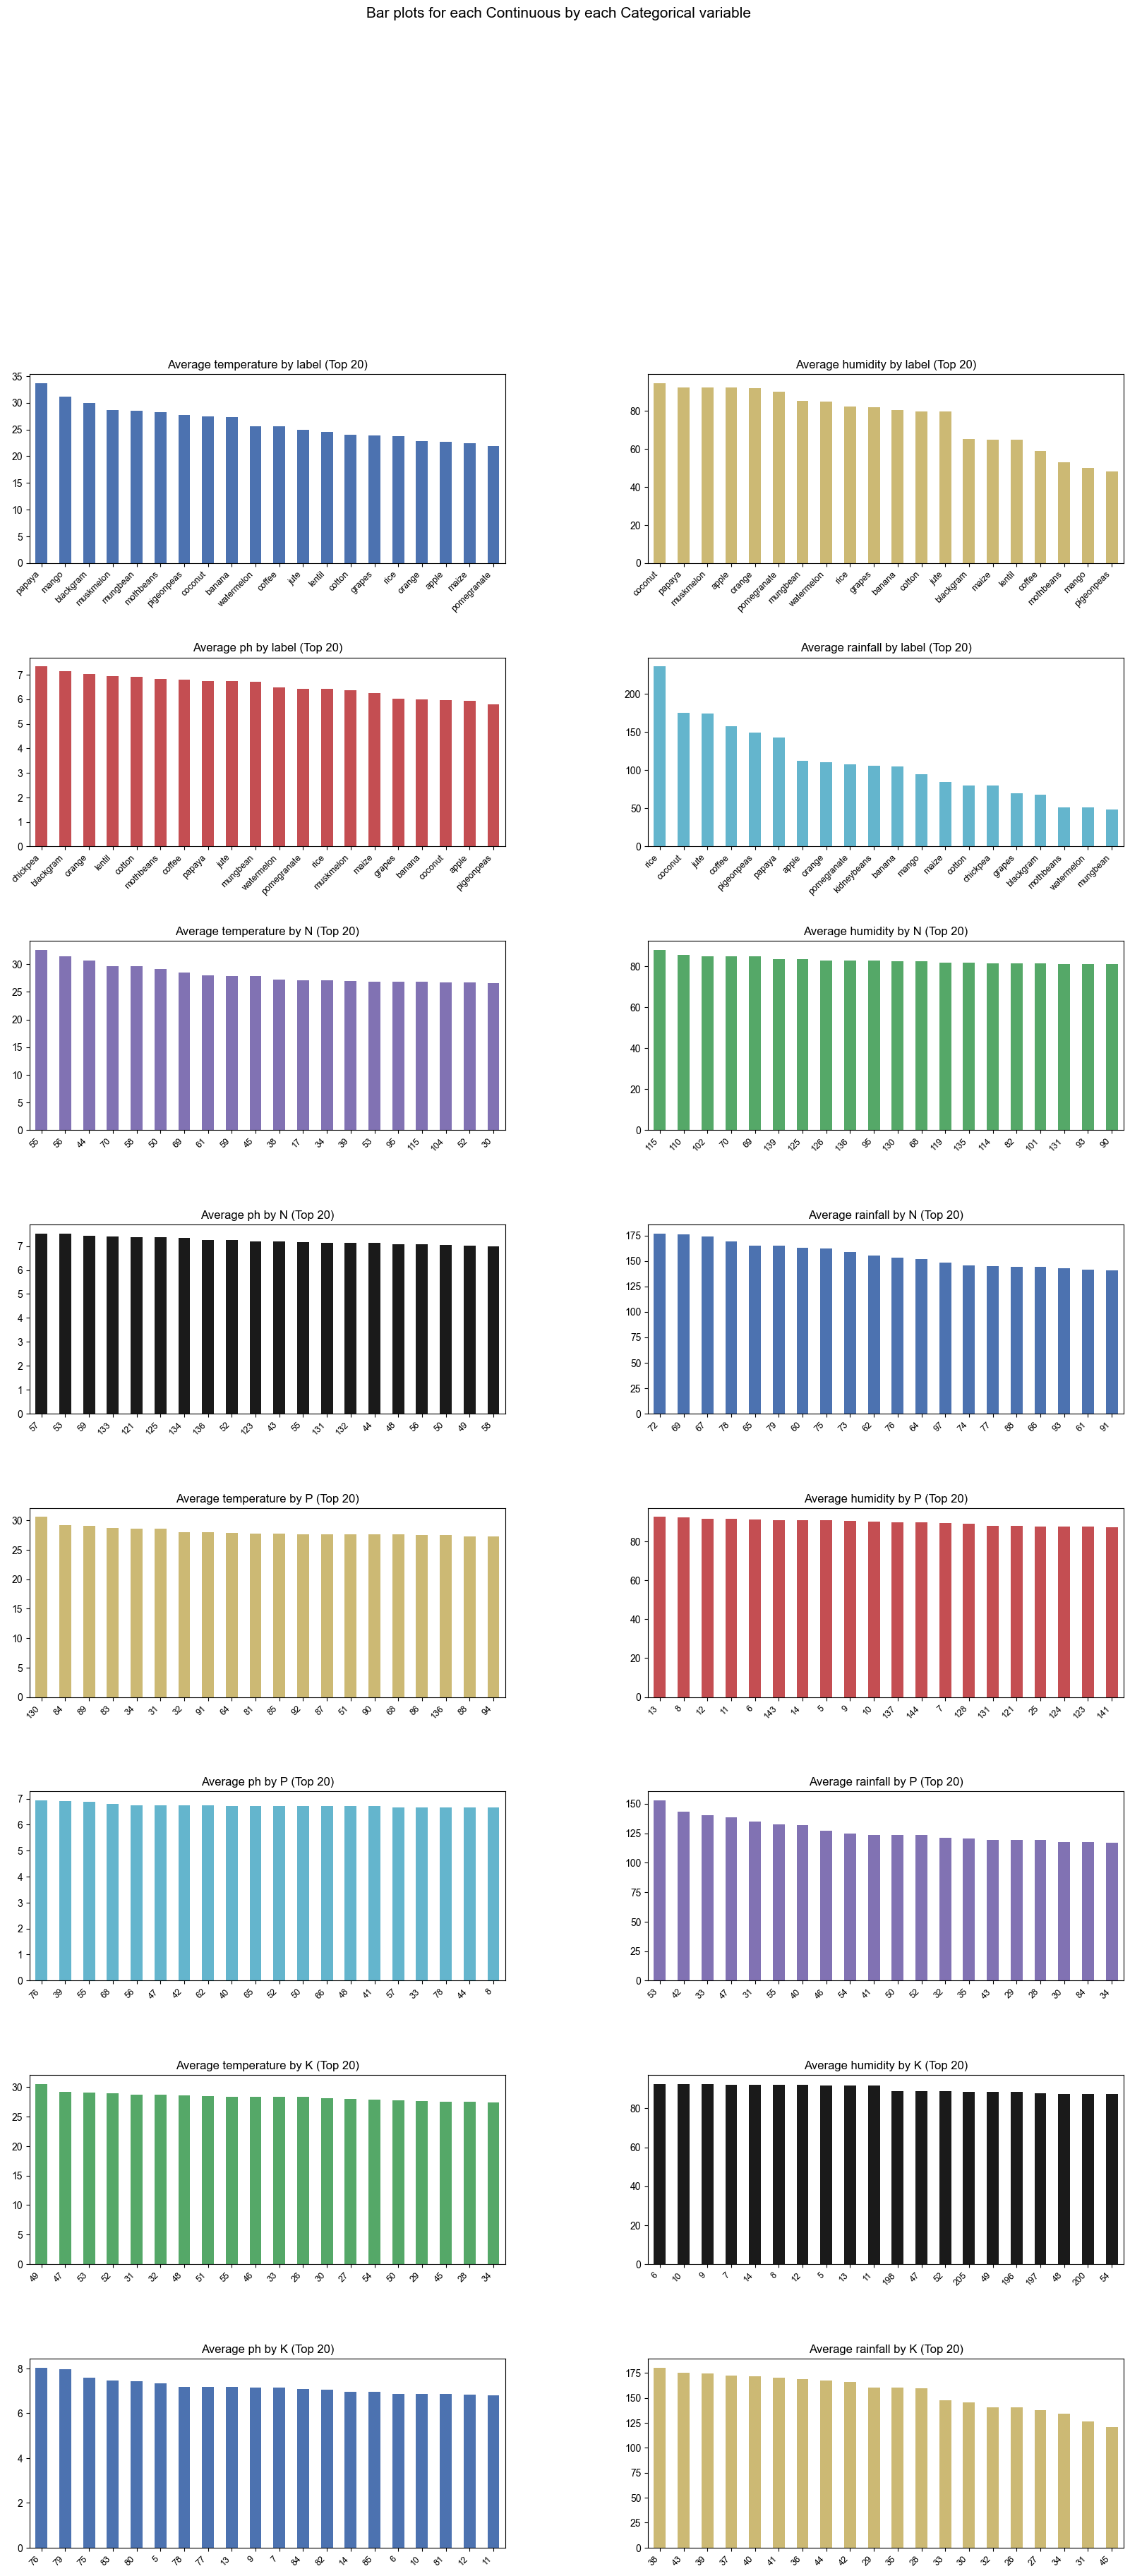

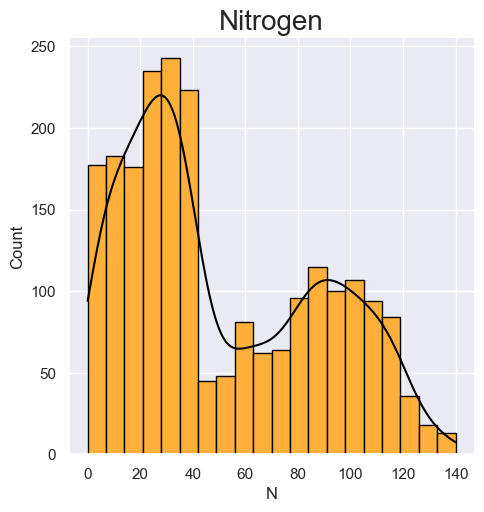

In [49]:
sns.displot(x=df['N'],data=df, bins=20, kde=True, edgecolor="black", color='black', facecolor="#ffb03b")
plt.title("Nitrogen", size=20)
plt.show()

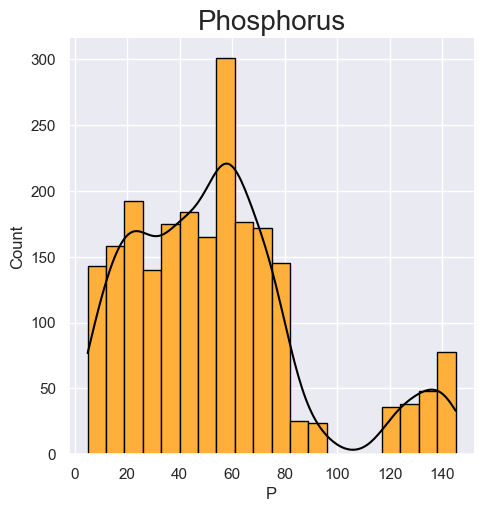

In [50]:
sns.displot(x=df['P'],data=df, bins=20, kde=True, edgecolor="black", color='black', facecolor="#ffb03b")
plt.title("Phosphorus", size=20)
plt.show()

In [51]:
# One class code missing and to be added

In [52]:
#!pip install sweetviz

In [53]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('Sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [54]:
#!pip install --upgrade jinja2

In [55]:
#pip install autoviz==0.1.905

In [56]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [57]:
import matplotlib.pyplot as plt
plt.style.use('default')  # Or any style you prefer


In [58]:
#!pip install --upgrade autoviz

In [59]:
#!pip install --upgrade bokeh

In [60]:
#import autoviz
#print(autoviz.__version__)

In [61]:
#!pip install bokeh==2.4.3

In [62]:
#!pip install --upgrade panel holoviews

In [63]:
#!pip install --upgrade pandas

In [2]:
#pip show autoviz # Install autoviz

In [65]:
#!pip install scikit-learn

In [66]:
#pip install --upgrade nltk

Shape of your Data Set loaded: (2200, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables

Number of All Scatter Plots = 10


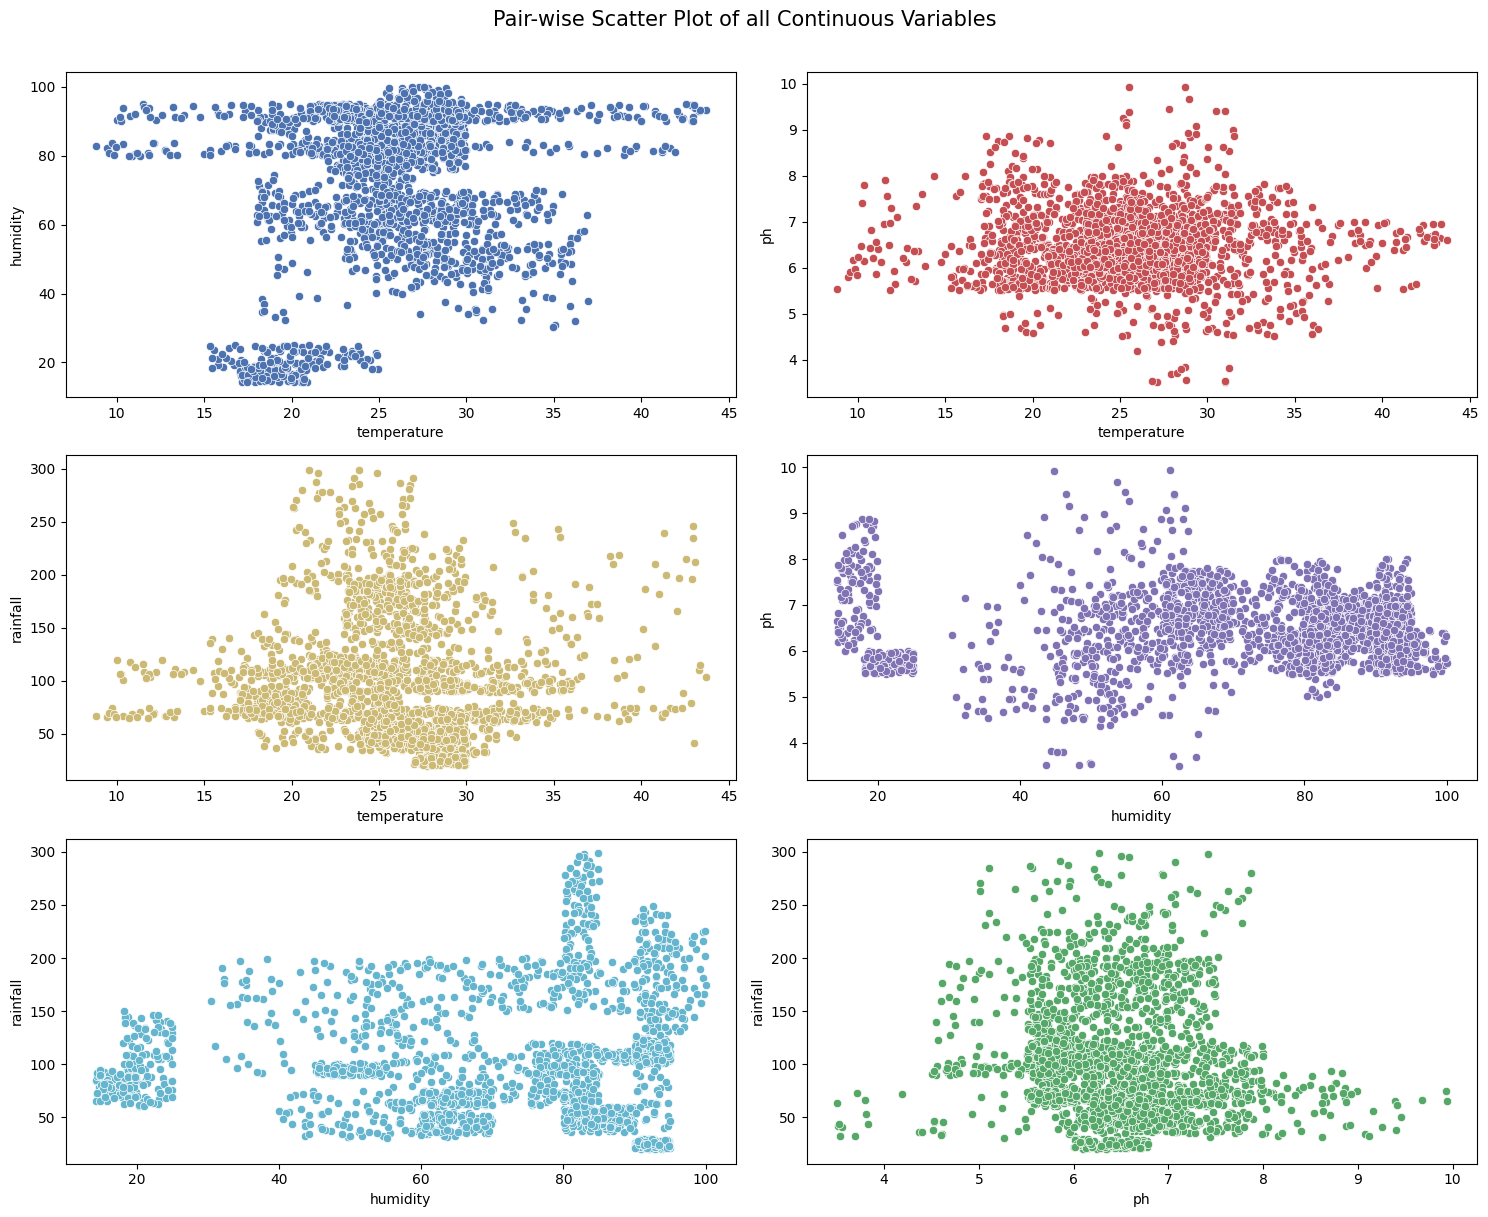

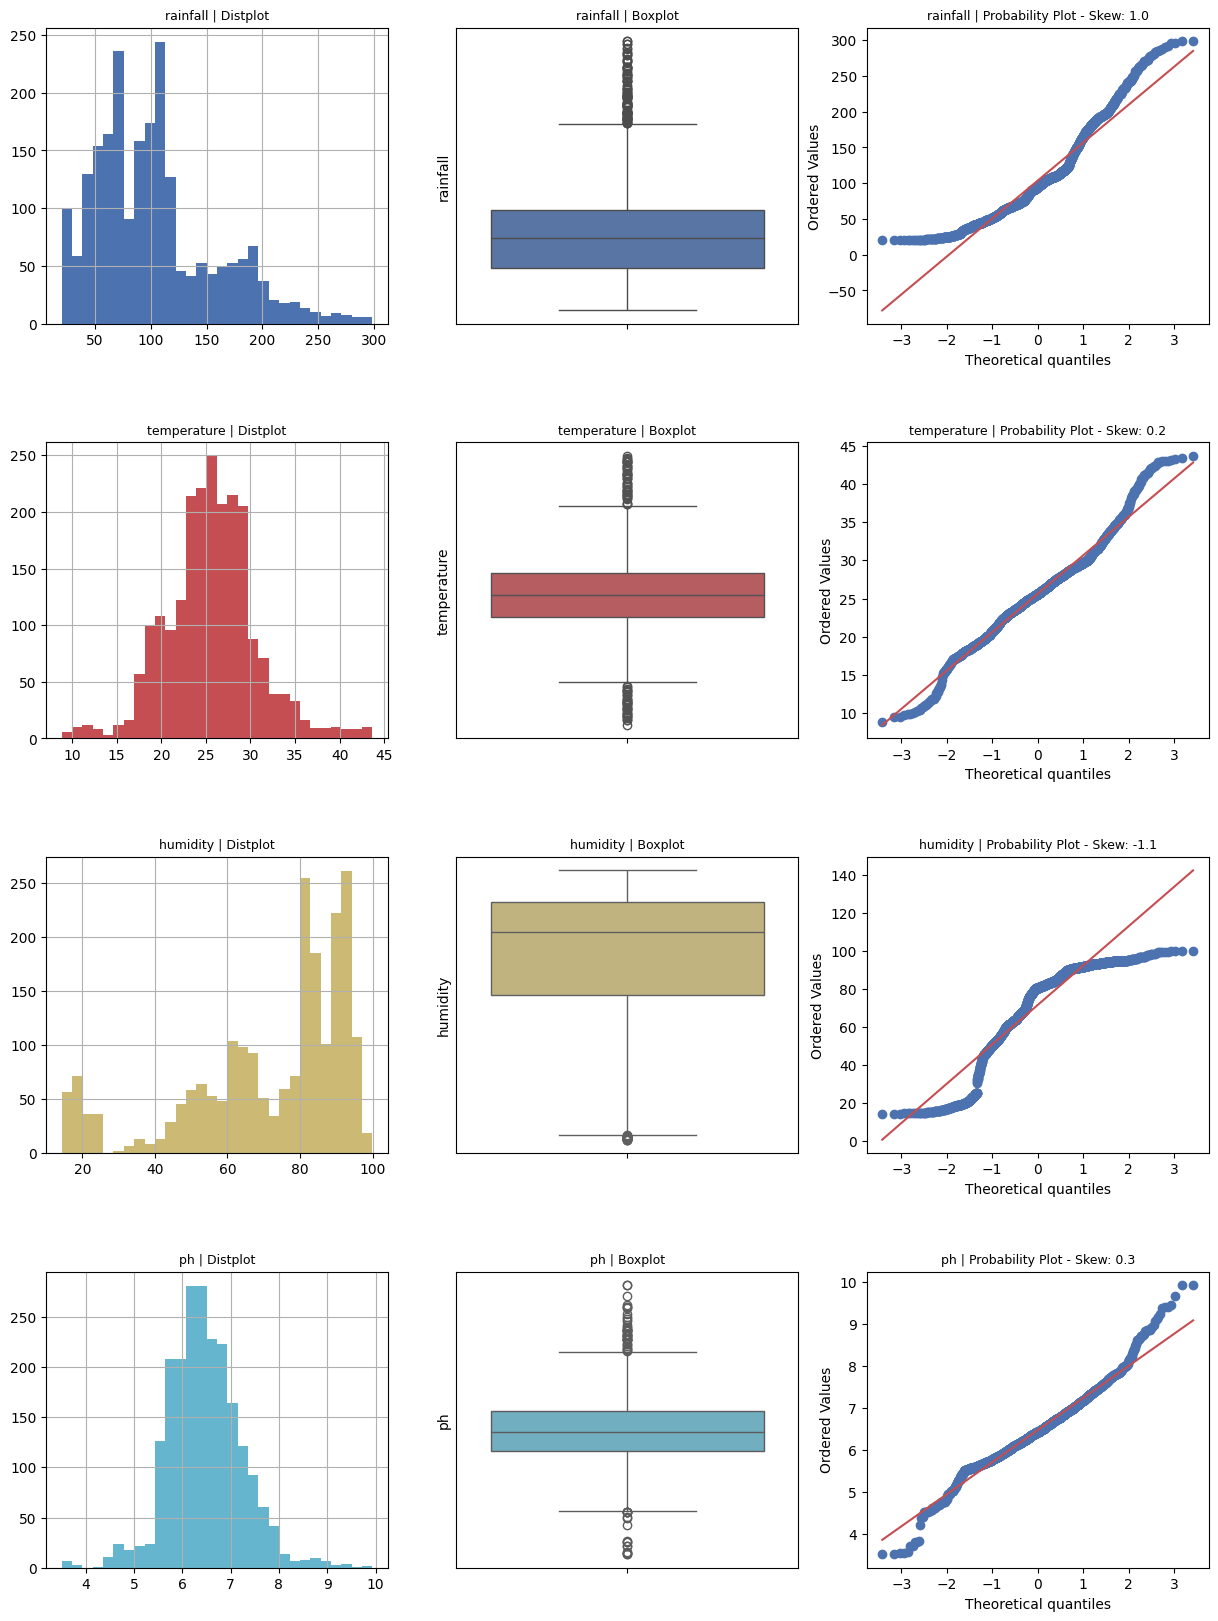

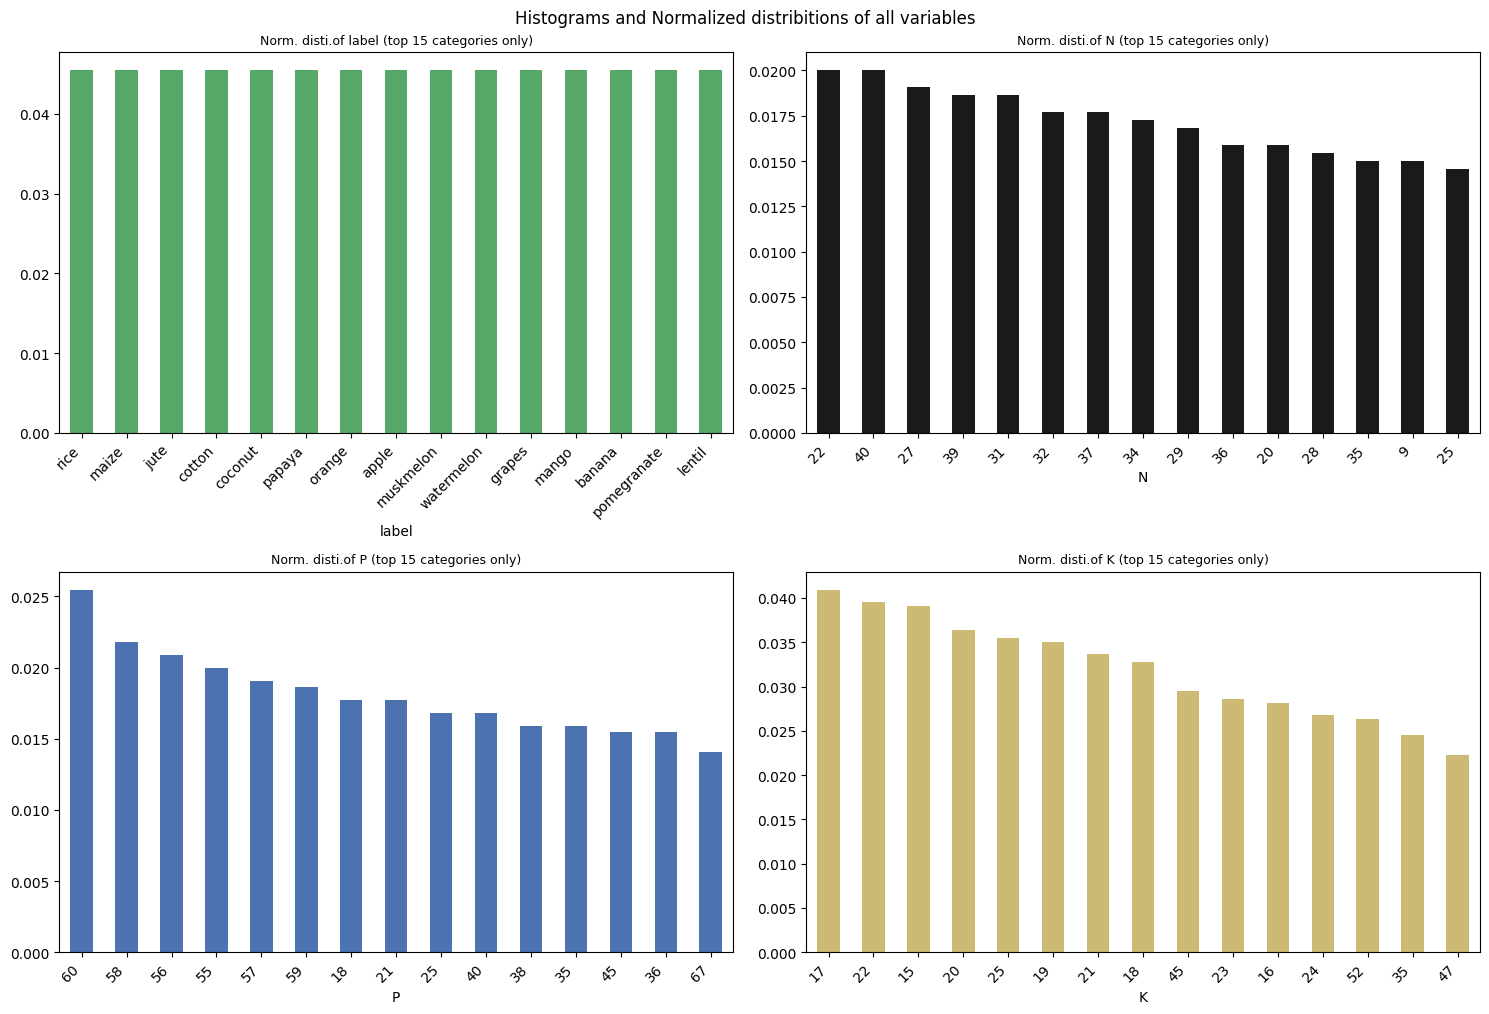

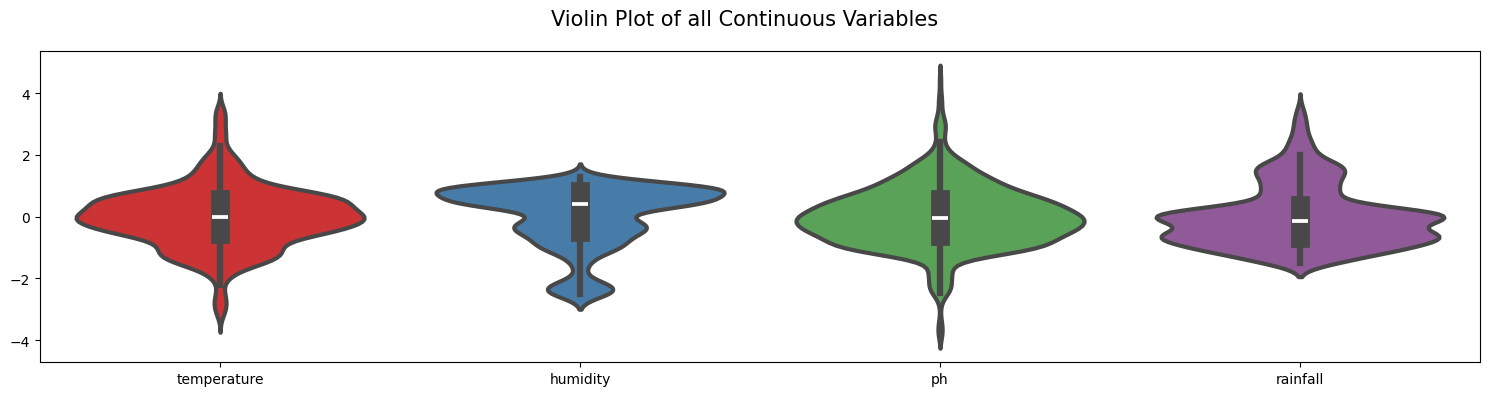

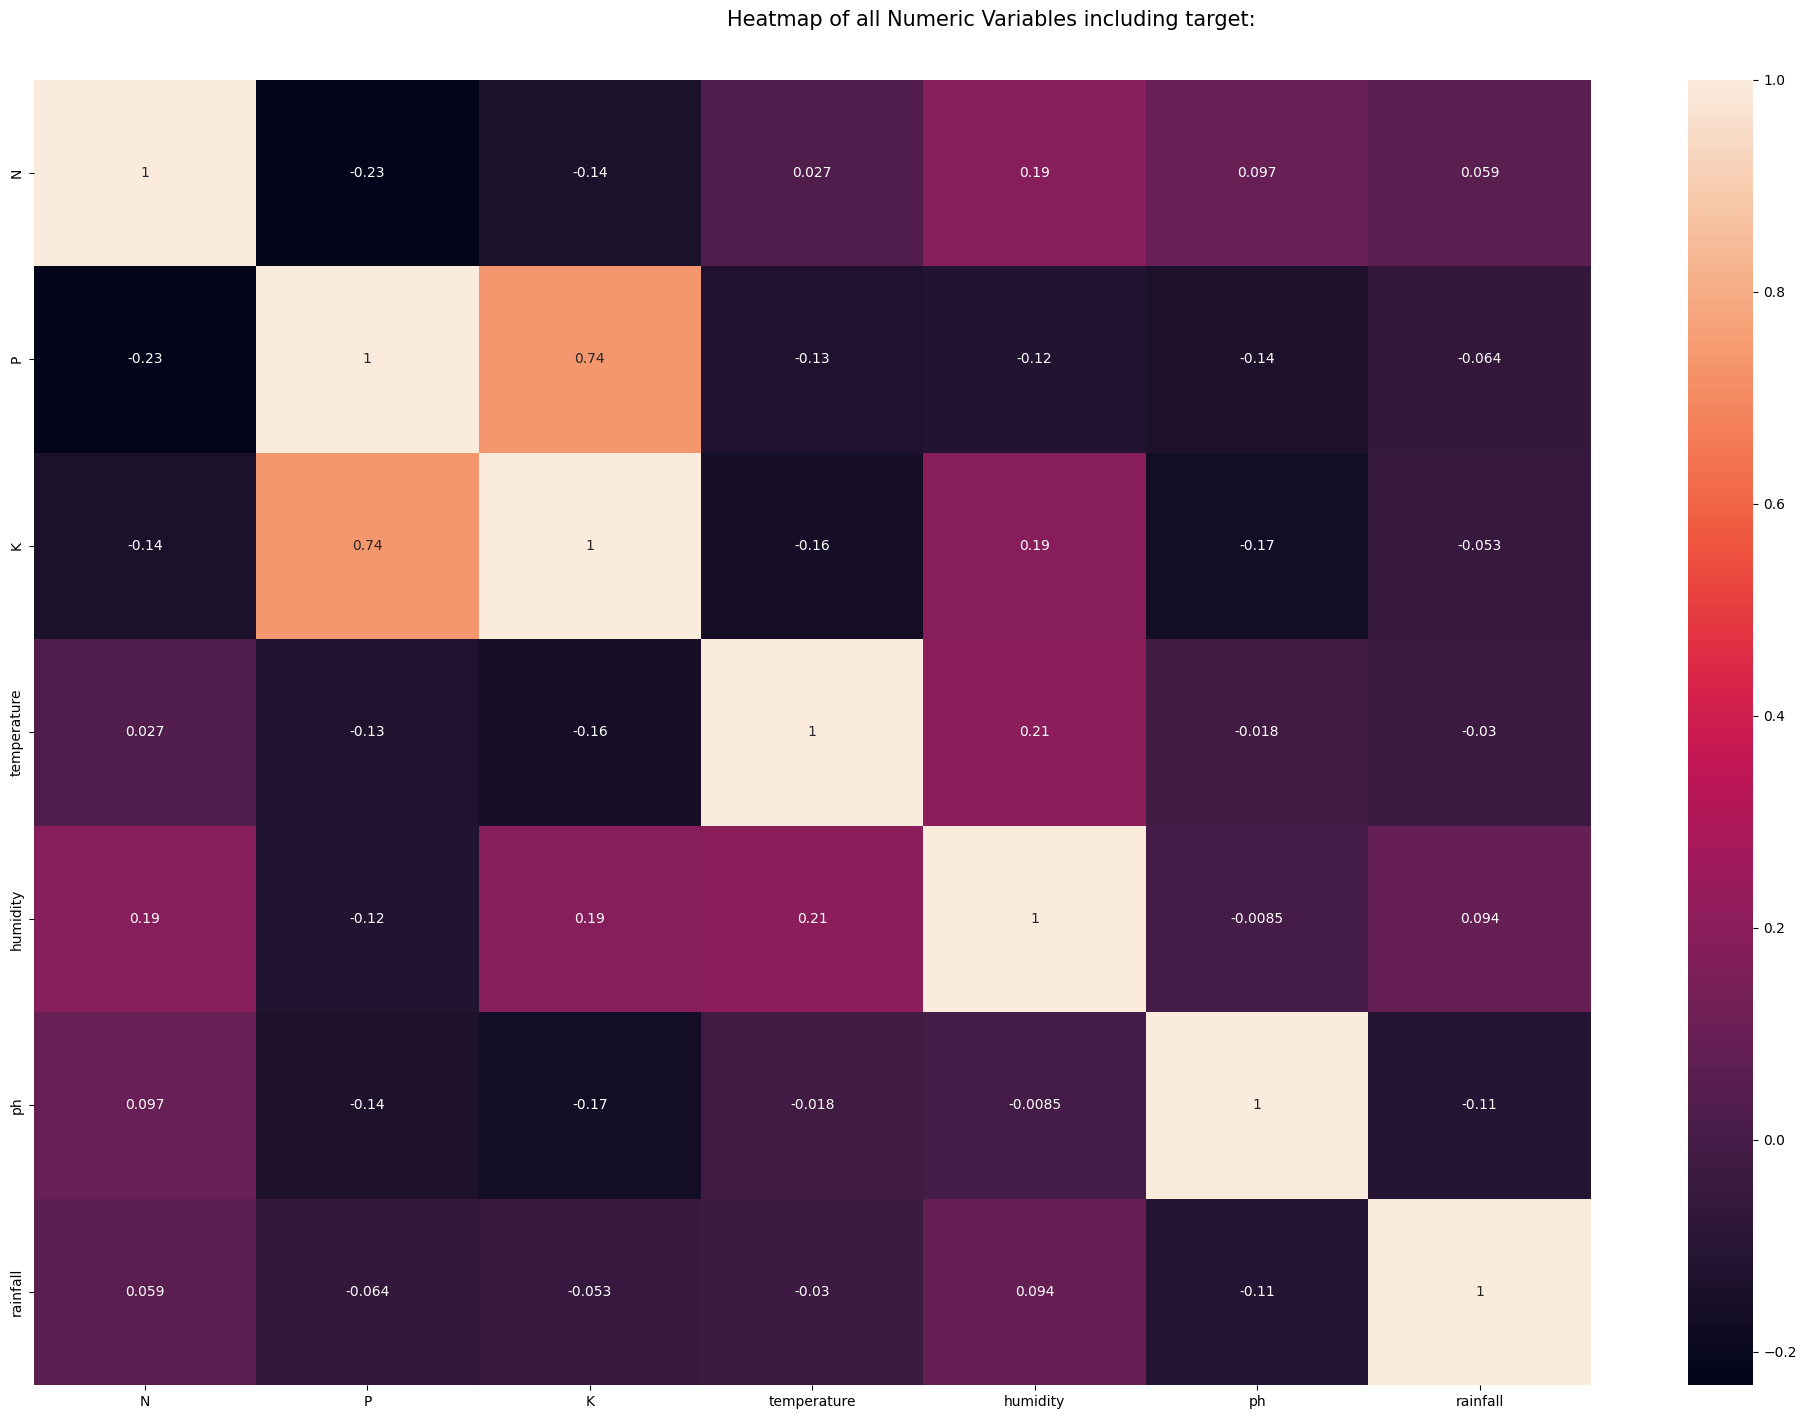

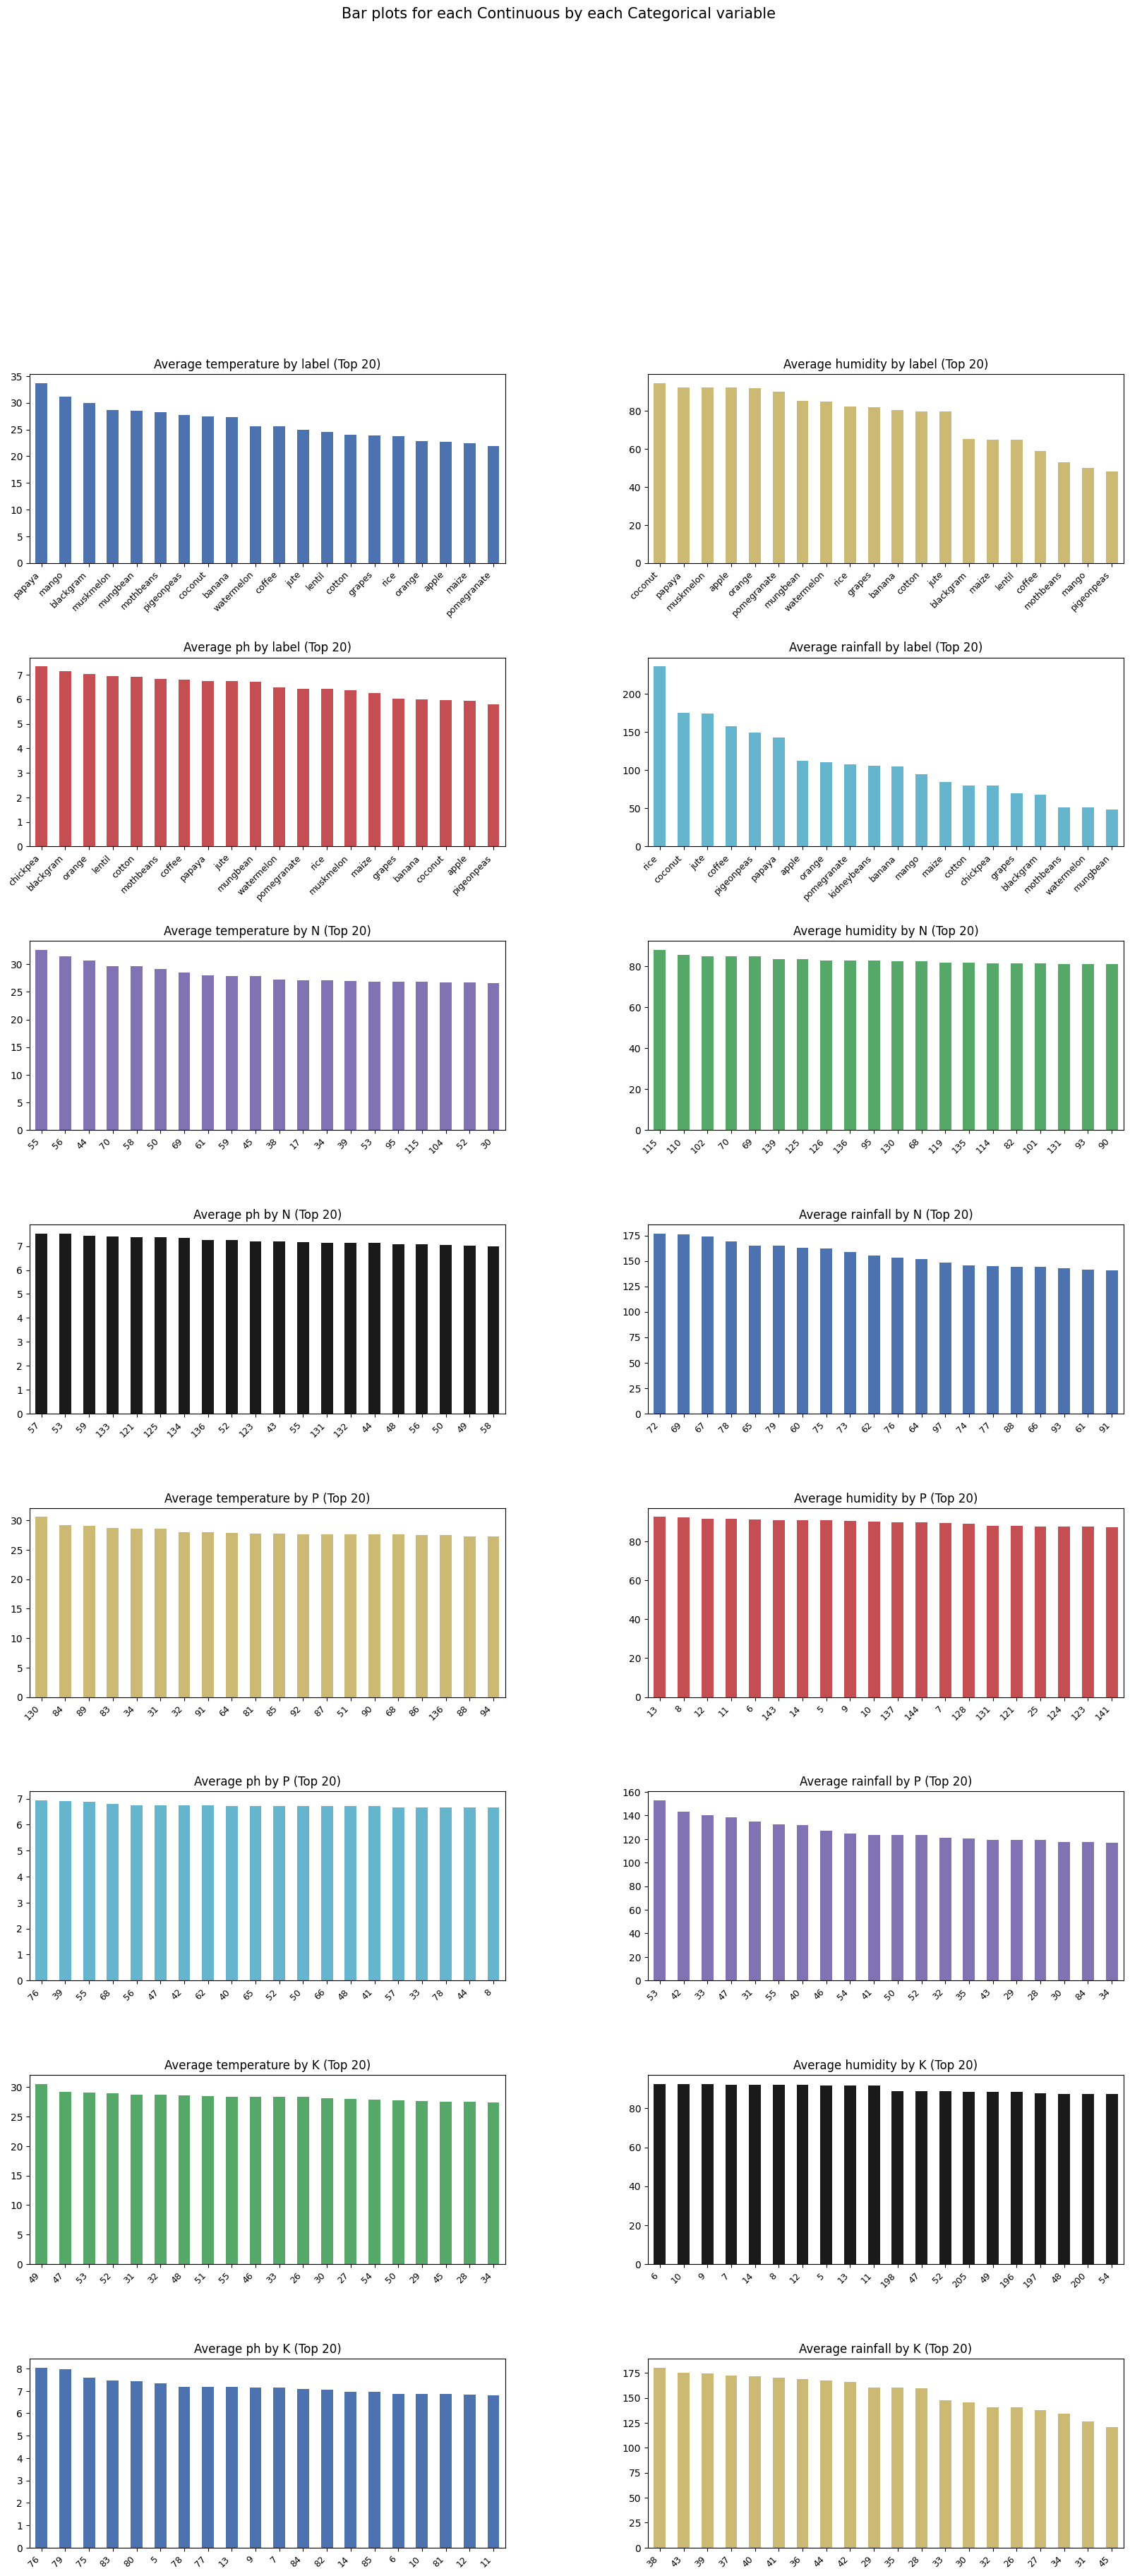

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


N    P   K  temperature  humidity      ph      rainfall   label 
0      90  42  43   20.879744   82.002744  6.502985  202.935536    rice
1      85  58  41   21.770462   80.319644  7.038096  226.655537    rice
2      60  55  44   23.004459   82.320763  7.840207  263.964248    rice
3      74  35  40   26.491096   80.158363  6.980401  242.864034    rice
4      78  42  42   20.130175   81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32   26.774637   66.413269  6.780064  177.774507  coffee
2196   99  15  27   27.417112   56.636362  6.086922  127.924610  coffee
2197  118  33  30   24.131797   67.225123  6.362608  173.322839  coffee
2198  117  32  34   26.272418   52.127394  6.758793  127.175293  coffee
2199  104  18  30   23.603016   60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [67]:
from autoviz.AutoViz_Class import AutoViz_Class
autoviz = AutoViz_Class()
autoviz.AutoViz(filename="", dfte=df)

#### Amazing automation for model Building

##### PYCARET PACKAGE

In [ ]:
# Question When i installed pycaret it deleted matplotlib 3.9.2 and so the code could not be run from start

In [2]:
!pip install --user pycaret

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.1 requires bokeh<3,>=2, but you have bokeh 3.6.1 which is incompatible.
dataprep 0.4.1 requires flask<2.0.0,>=1.1.4, but you have flask 3.0.3 which is incompatible.
dataprep 0.4.1 requires jinja2<3.0,>=2.11, but you have jinja2 3.1.4 which is incompatible.
dataprep 0.4.1 requires pandas<2.0,>=1.1, but you have pandas 2.1.4 which is incompatible.



  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached pyod-2.0.2-py3-none-any.whl
  Using cached category_encoders-2.6.4-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached matplotlib-3.7.5-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached sktime-0.26.0-py3-none-any.whl.metadata (29 kB)
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached dash-2.18.2-py3-none-any.whl.metadata (10 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
Using cached pycaret-3.3.2-py3-none-any.whl (486 kB)
Using cached sktime-0.26.0-py3-none-any.whl (21.8 MB)
Using cached category_encoders-2.

In [3]:
df = pd.read_csv("Plan_Growth_recommendation.csv")
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
data =df.sample(frac=0.8, random_state=42).reset_index(drop=True) # Training data - 80%
data_unseen = df.drop(data.index).reset_index(drop=True) # Test Data 20%

In [5]:
print(data.shape, data_unseen.shape)

(1760, 8) (440, 8)


In [6]:
from pycaret.classification import *

In [7]:
import pycaret
print(pycaret.__version__)

3.3.2


In [8]:
#pip install --user pycaret I have used this one to install

In [14]:
classification_model = setup( data= data, target='label',session_id=42)

In [10]:
import pandas as pd
print(pd.__version__)

2.1.4


In [15]:
#!pip install --upgrade pycaret This command resolved issue


In [16]:
#!pip install --upgrade lightgbm dask pandas # Not woking

In [17]:
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
# Hyper parameter tuning
tuned_rf= tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


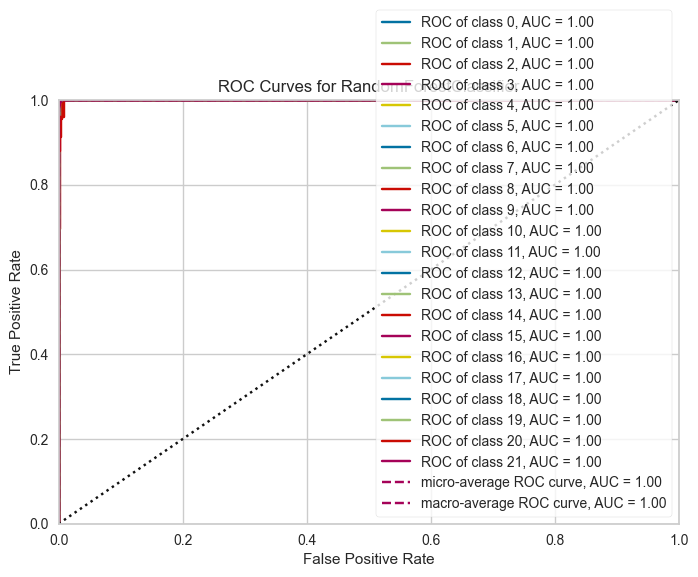

In [21]:
plot_model(tuned_rf,plot='auc')

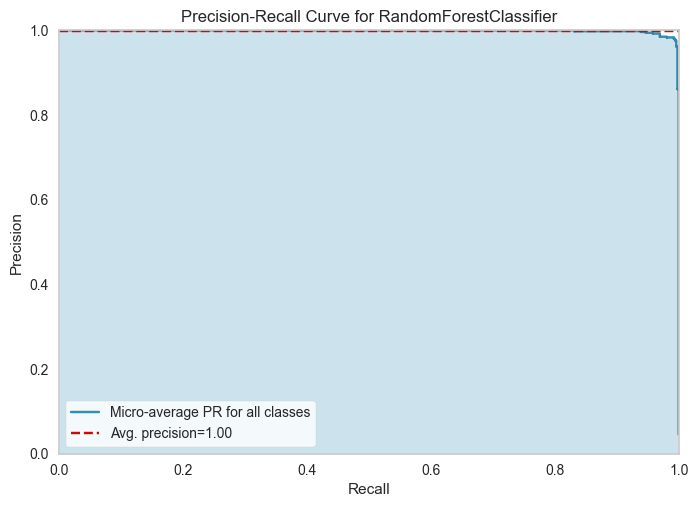

In [22]:
plot_model(tuned_rf,plot='pr')

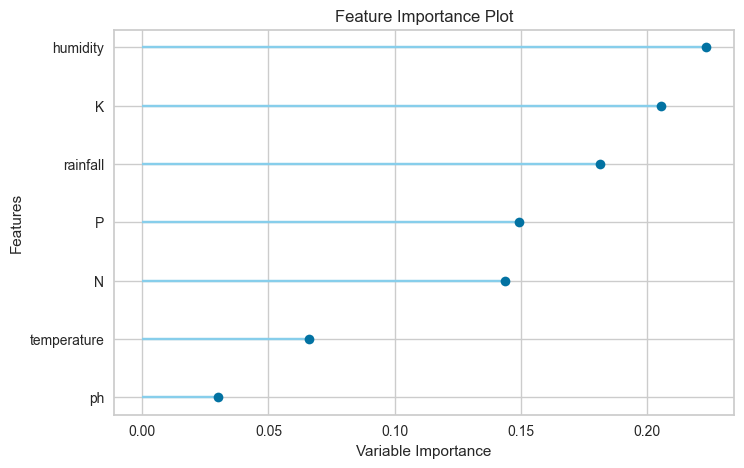

In [23]:
plot_model(tuned_rf,plot='feature')

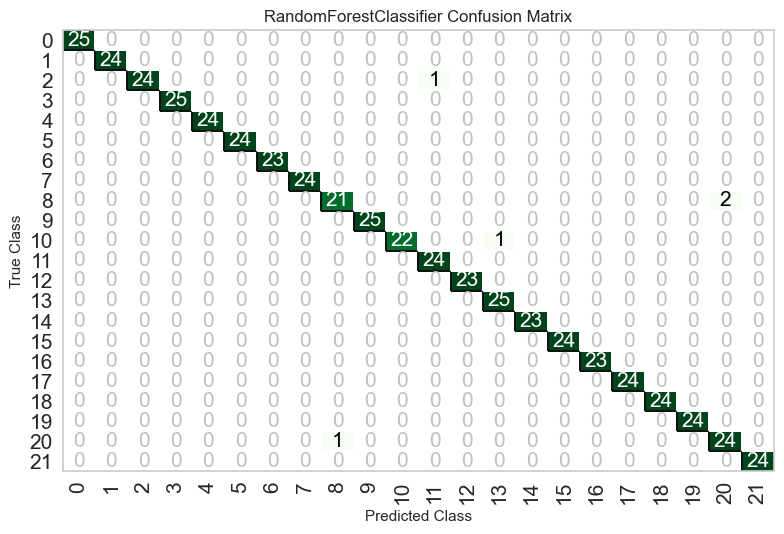

In [24]:
plot_model(tuned_rf,plot='confusion_matrix')

In [39]:
#evaluate_model(tuned_rf)
evaluate_model(tuned_rf)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
!pip install --upgrade ipywidgets

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
C:\Users\rakeshrane\anaconda3\Lib\site-packages\jupyterlab\debuglog.py:54: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
C:\Users\rakeshrane\anaconda3\Lib\site-packages\jupyterlab\debuglog.py:55: UserWarning: ValueError: Please install nodejs >=20.0.0 before continuing. nodejs may be installed using conda or directly from the nodejs website.
  warnings.warn(msg[-1].strip())
C:\Users\rakeshrane\anaconda3\Lib\site-packages\jupyterlab\debuglog.py:56: UserWarning: See the log file for details: C:\Users\RAKESH~1\AppData\Local\Temp\jupyterlab-debug-x0d7huf_.log
  warnings.warn(f"See the log file for details: {log_path!s}")


In [26]:
#!pip install ipywidgets --upgrade installed but did not slove the erro

   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.8 kB ? eta -:--:--
   -------------------------------- ------- 112.6/139.8 kB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 133.1/139.8 kB 2.0 MB/s eta 0:00:01
   -------------------------------------- - 133.1/139.8 kB 2.0 MB/s eta 0:00:01
   -------------------------------------- 139.8/139.8 kB 753.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   -------------------------------------- - 204.8/214.4 kB 6.3 MB/s eta 0:00:01
   -------------------------------------- - 204.8/214.4 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 214.4/214.4 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.3 MB 6.4 MB/s eta 0:00:01
   - -------------------------------------- 0.1/2.3 MB 6.4 MB/s eta 0:00:01
   --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires pandas<2.2.0, but you have pandas 2.2.3 which is incompatible.
dataprep 0.4.1 requires bokeh<3,>=2, but you have bokeh 3.6.1 which is incompatible.
dataprep 0.4.1 requires dask[array,dataframe,delayed]<3.0,>=2.25, but you have dask 2024.11.2 which is incompatible.
dataprep 0.4.1 requires flask<2.0.0,>=1.1.4, but you have flask 3.0.3 which is incompatible.
dataprep 0.4.1 requires ipywidgets<8.0,>=7.5, but you have ipywidgets 8.1.5 which is incompatible.
dataprep 0.4.1 requires jinja2<3.0,>=2.11, but you have jinja2 3.1.4 which is incompatible.
dataprep 0.4.1 requires pandas<2.0,>=1.1, but you have pandas 2.2.3 which is incompatible.


In [28]:
import ipywidgets
print(ipywidgets.__version__)

7.6.5


In [3]:
#!pip install widgetsnbextension # Install


In [31]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [35]:
predict_model(tuned_rf)

N    P    K  temperature   humidity        ph    rainfall  \
915    24   38   22    24.478764  58.516640  8.202706   34.969334   
1266   97   50   41    24.529226  80.544983  7.070960  260.263397   
1729    9  122  201    29.587484  80.919342  5.570291   68.064171   
1260   37    6   13    26.030973  91.508194  7.511755  101.284775   
1081   20   27   41    20.513435  92.516762  5.700089  110.576401   
...   ...  ...  ...          ...        ...       ...         ...   
1437   83   11   53    29.540972  92.917786  6.163921   21.965307   
507    17   73   18    19.501122  34.510864  5.632353  197.375259   
629    14   19   14    17.684088  94.358154  6.699165  108.063820   
1173  104   25   55    29.811966  90.368813  6.123803   22.687666   
72     69   47   40    25.371227  76.240364  6.130136  183.827072   

            label prediction_label  prediction_score  
915     mothbeans        mothbeans            0.7812  
1266         rice             rice            0.8528  
1729       grapes           grapes            0.9790  
1260       orange           orange            0.9194  
1081  pomegranate      pomegranate            0.9516  
...           ...              ...               ...  
1437    muskmelon        muskmelon            0.9823  
507    pigeonpeas       pigeonpeas            0.8865  
629        orange           orange            0.9554  
1173    muskmelon        muskmelon            0.9850  
72           jute             jute            0.6813  

[528 rows x 10 columns]

In [36]:
unseen_predict = predict_model(tuned_rf, data=data_unseen)
unseen_predict.head()

N   P   K  temperature   humidity        ph    rainfall   label  \
0  49  55  51    24.872120  93.905602  6.676579  135.169449  papaya   
1  59  62  49    43.360516  93.351913  6.941497  114.778069  papaya   
2  63  58  47    26.830540  90.753799  6.864144  144.665649  papaya   
3  70  65  52    30.420122  93.126595  6.583529   75.952950  papaya   
4  63  50  52    28.645555  93.226425  6.751748  115.816391  papaya   

  prediction_label  prediction_score  
0           papaya            0.8412  
1           papaya            0.9315  
2           papaya            0.6430  
3           papaya            0.8907  
4           papaya            0.8297